In [472]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import warnings
import numpy as np
import os
from tqdm import tqdm
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# 1. Economía

In [302]:
base_path = r"/Users/fiorella/Downloads/Datasets/4. Economia/1. Empleo e ingresos"

required_cols = ["AÑO", "MES", "CONGLOME", "VIVIENDA", "HOGAR", "CODPERSO",
    "UBIGEO", "DOMINIO", "ESTRATO",
    "P500N", "P507", "P510A1", "P511A","P513T", "P513A1", "P513A2",
    "P514", "P523", "P524A1",
    "P5566A", "P5566C", "P5567A", "P5567C",
    "D5291B", "D5293B", "P207", "P208A", "P209",
    "OCU500", "OCUPINF"]

In [303]:
def cargar_sav_en_dfs(base_path, required_cols):
    
    # Archivos .sav en la carpeta
    sav_files = [f for f in os.listdir(base_path) if f.lower().endswith(".sav")]
    
    dfs = []
    for fname in tqdm(sav_files, desc='Procesando archivos'):
        path = os.path.join(base_path, fname)
        df, meta = pyreadstat.read_sav(path)
        
        # Normaliza nombres de columnas a MAYÚSCULAS
        df.columns = df.columns.str.upper()
        
        # Verifica columnas faltantes
        missing = [c for c in required_cols if c not in df.columns]
        if missing:
            print(f"En {fname} faltan columnas: {missing}")
            for c in missing:
                df[c] = pd.NA  # agrega columnas faltantes
        
        # Selecciona y ordena las columnas requeridas
        dfs.append(df[required_cols])
    
    return dfs

In [304]:
dfs = cargar_sav_en_dfs(base_path, required_cols)

Procesando archivos:  27%|██████▎                | 3/11 [00:49<02:10, 16.28s/it]

En Enaho01a-2024-500.sav faltan columnas: ['OCUPINF']


Procesando archivos:  45%|██████████▍            | 5/11 [01:15<01:24, 14.10s/it]

En Enaho01a-2016-500.sav faltan columnas: ['D5291B', 'D5293B']


Procesando archivos:  55%|████████████▌          | 6/11 [01:26<01:04, 12.97s/it]

En Enaho01a-2017-500.sav faltan columnas: ['D5291B', 'D5293B']


Procesando archivos:  73%|████████████████▋      | 8/11 [01:51<00:37, 12.62s/it]

En Enaho01A-2015-500.sav faltan columnas: ['D5291B', 'D5293B']


Procesando archivos: 100%|██████████████████████| 11/11 [02:29<00:00, 13.59s/it]

En Enaho01a-2014-500.sav faltan columnas: ['D5291B', 'D5293B']


In [305]:
df = pd.concat(dfs, ignore_index=True)

print(f"Merge completo. Dimensiones del DataFrame final: {df.shape}")

/var/folders/yy/l5hygg1s2qn0hbtjb46_lqwh0000gn/T/ipykernel_88931/483851219.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs, ignore_index=True)


Merge completo. Dimensiones del DataFrame final: (996730, 30)


In [306]:
df.describe()

,DOMINIO,ESTRATO,P507,P510A1,P511A,P513T,P513A1,P513A2,P514,P523,P524A1,P5566A,P5566C,P5567A,P5567C,D5291B,D5293B,P207,P208A,P209,OCU500,OCUPINF
count,996730.000000,996730.000000,734017.000000,658857.000000,404684.000000,734115.000000,704495.000000,704416.000000,734017.000000,281638.000000,278650.000000,995319.000000,128845.000000,995319.000000,119997.000000,50556.000000,9449.000000,996730.000000,996730.000000,996730.000000,996730.000000,632552.000000
mean,4.877253,4.181669,3.173218,2.593461,5.377247,35.720368,8.552611,1.531904,1.807743,3.362682,1176.193946,1.952633,71.264170,1.961356,79.809204,4706.857999,3524.203725,1.517622,41.907991,3.370008,1.869188,1.217509
std,2.374357,2.435160,1.286918,0.726573,2.412737,20.475078,12.003324,2.577340,0.394074,0.912500,1389.894038,0.212422,95.554913,0.192745,117.395888,38473.657212,30860.713179,0.499690,19.319615,2.091788,1.337259,0.412552
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1.000000,14.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,2.000000,2.000000,2.000000,19.000000,0.000000,0.000000,2.000000,2.000000,250.000000,2.000000,0.000000,2.000000,0.000000,1302.000000,1038.000000,1.000000,25.000000,2.000000,1.000000,1.000000
50%,5.000000,4.000000,3.000000,3.000000,7.000000,36.000000,3.000000,0.000000,2.000000,4.000000,800.000000,2.000000,0.000000,2.000000,0.000000,2498.000000,1861.000000,2.000000,40.000000,2.000000,1.000000,1.000000
75%,7.000000,7.000000,4.000000,3.000000,7.000000,48.000000,12.000000,2.000000,2.000000,4.000000,1500.000000,2.000000,200.000000,2.000000,250.000000,4365.000000,3128.000000,2.000000,56.000000,6.000000,4.000000,1.000000
max,8.000000,8.000000,7.000000,3.000000,8.000000,98.000000,80.000000,11.000000,2.000000,4.000000,35000.000000,2.000000,1400.000000,2.000000,1000.000000,999999.000000,999999.000000,2.000000,98.000000,6.000000,4.000000,2.000000


In [6]:
cols = ["AÑO", "MES", "CONGLOME", "VIVIENDA", "HOGAR", "CODPERSO",
    "UBIGEO", "DOMINIO", "ESTRATO",
    "P500N", "P507", "P510A1", "P511A","P513T", "P513A1", "P513A2",
    "P514", "P523", "P524A1",
    "P5566A", "P5566C", "P5567A", "P5567C",
    "D5291B", "D5293B", "P207", "P208A", "P209",
    "OCU500", "OCUPINF"]

In [7]:
df_v1 = df[cols]

In [8]:
# Indicador Transferencia del programa JUNTOS

df_v2 = df_v1.dropna(subset=['P5566A']) 

In [9]:
# P510A1: Se encuentra registrado en la SUNAT
# Reemplazo los valores nulos como 3 (que significa que no esta registrado en la sunat)

df_v2['P510A1'] = df_v2['P510A1'].fillna(3)

In [10]:
# Monto (S/.) de transferencia del programa JUNTOS
# Reemplazo los valores nulos como 0

df_v2['P5566C'] = df_v2['P5566C'].fillna(0)

In [11]:
# Monto (S/.) de transferencia del programa PENSIÓN 65
# Reemplazo los valores nulos como 0

df_v2['P5567C'] = df_v2['P5567C'].fillna(0)

In [12]:
# Elimino registros que no cuenten con el campo relacionado al Tipo de trabajador

df_v3 = df_v2.dropna(subset=['P507'])

In [13]:
# Situación de informalidad
# Reemplazo los valores nulos como 1 (empleo informal)

df_v3['OCUPINF'] = df_v3['OCUPINF'].fillna(1)

Reemplazo nulos con 0 en la variable que indica cuanto recibe la persona en alimentos (D5291B) y transporte como parte de pago (D5293B) anualmente

In [33]:
df_v3['D5291B'] = df_v3['D5291B'].fillna(0)
df_v3['D5293B'] = df_v3['D5293B'].fillna(0)

In [34]:
# Elimo registros que no cuenten con el campo relacionado a Ingreso total-monto (S/.)

df_v4 = df_v3.dropna(subset=['P524A1'])

In [35]:
# Elimo registros que no cuenten con el campo relacionado a años de trabajo en su ocupación principal

df_v5 = df_v4.dropna(subset=['P513A1']) 

In [36]:
# Meses de trabajo en su ocupación principal
# Reemplazo los valores nulos como 0 meses

df_v5['P513A2'] = df_v5['P513A2'].fillna(0)

In [37]:
# Creo variable: Tiempo total de trabajo en años

df_v5['P513A3'] = df_v5['P513A1'] + df_v5['P513A2']/12

In [38]:
df_v6 = df_v5.drop(columns=['P513A1','P513A2'])

In [39]:
# Elimino registros que no cuenten con el campo Tipo de contrato

df_v6 = df_v6.dropna(subset=['P511A'])

In [40]:
df_v6.shape

(265830, 29)

In [41]:
# Frecuencia de pago (1: diario, 2: semanal, 3: quincenal, 4: mensual)

df_v6['P523'].unique()

array([4., 2., 3., 1.])

In [42]:
# Convirtiendo el monto de pago (P524A1) a un valor mensual

factores = {1: 30, 2: 4, 3: 2, 4: 1}

df_v6["P524A1"] = df_v6["P524A1"] * df_v6["P523"].map(factores).fillna(1)

In [43]:
df_v6["MES"]      = df_v6["MES"].astype(str).str.zfill(2)
df_v6["CONGLOME"] = df_v6["CONGLOME"].astype(str).str.zfill(6)
df_v6["VIVIENDA"] = df_v6["VIVIENDA"].astype(str).str.zfill(3)
df_v6["HOGAR"]    = df_v6["HOGAR"].astype(str).str.zfill(2)
df_v6["UBIGEO"]   = df_v6["UBIGEO"].astype(str).str.zfill(6)

In [44]:
df_v6["DOMINIO"] = df_v6["DOMINIO"].astype("Int64").astype(str)
df_v6["ESTRATO"] = df_v6["ESTRATO"].astype("Int64").astype(str)

In [45]:
def generar_codigo_unico(df):
    cols = ["AÑO", "MES", "CONGLOME", "VIVIENDA", "HOGAR", "UBIGEO", "DOMINIO", "ESTRATO"]

    # Aseguro que todas sean strings
    for c in cols:
        df[c] = df[c].astype(str)

    # Formateo MES con dos dígitos
    df["MES"] = df["MES"].str.zfill(2)

    # Creo el código único uniendo con guiones y pasando a mayúsculas
    df["CODIGO_UNICO"] = (
        df[cols]
        .apply(lambda row: "-".join(row.values), axis=1)
        .str.upper()
    )

    return df

In [46]:
df_economia = generar_codigo_unico(df_v6)

In [47]:
df_economia = df_economia.dropna()

In [48]:
df_economia.shape

(265827, 30)

Sumarias

In [49]:
base_path = r'/Users/fiorella/Downloads/Datasets/4. Economia/2. Sumarias'

required_cols = ['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO', 'ESTRATO',
    "SG23",     # Gasto por alimentos a consumir en el hogar
    "SG42",     # Gasto en electrónicos (tv, computadora)
    "SG421",    # Gasto en electrodomésticos
    "SG422",    # Gasto en transporte
    "INGBRUHD", # Ingreso bruto
    "INGNETHD", # Ingreso neto
    "INGTPU01", # Ingreso bono JUNTOS
    "INGTPU03", # Ingreso Pensión 65
    "INGMO1HD", # Ingreso monetario bruto
    "INGMO2HD", # Ingreso monetario neto
    "GASHOG2D", # Gasto total bruto
    "ESTRSOCIAL", # Estrato social
    "POBREZA"     # Pobreza
]

csv_files = [
    f for f in os.listdir(base_path)
    if f.lower().endswith('.csv')
]

dfs = []
file_missing = {}

for fname in tqdm(csv_files, desc="Procesando CSV"):
    path = os.path.join(base_path, fname)
    df = pd.read_csv(path, encoding='latin1')
    
    # Columnas a mayúsculas
    df.columns = df.columns.str.upper()
    
    # Detecta faltantes y agrega como NA
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        file_missing[fname] = missing
        for c in missing:
            df[c] = pd.NA
    
    # Selecciona solo las columnas requeridas (en el orden dado)
    dfs.append(df[required_cols])

for fname, miss in file_missing.items():
    print(f"En {fname} faltan columnas: {miss}")

df_sum = pd.concat(dfs, ignore_index=True, sort=False)

Procesando CSV: 100%|███████████████████████████| 11/11 [00:05<00:00,  1.88it/s]


In [52]:
df_sum["MES"]      = df_sum["MES"].astype(str).str.zfill(2)
df_sum["CONGLOME"] = df_sum["CONGLOME"].astype(str).str.zfill(6)
df_sum["VIVIENDA"] = df_sum["VIVIENDA"].astype(str).str.zfill(3)
df_sum["HOGAR"]    = df_sum["HOGAR"].astype(str).str.zfill(2)
df_sum["UBIGEO"]   = df_sum["UBIGEO"].astype(str).str.zfill(6)

In [53]:
df_sum_v1 = generar_codigo_unico(df_sum)

In [54]:
df_economia_final = pd.merge(
    df_sum_v1,
    df_economia,
    on="CODIGO_UNICO",
    how="inner",
    suffixes=("", "_drop")   # a las duplicadas del segundo df les pone "_drop"
)

# Eliminar todas las columnas que terminan en "_drop"
df_economia_final = df_economia_final.loc[:, ~df_economia_final.columns.str.endswith("_drop")]

In [55]:
df_economia_final.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'SG23', 'SG42', 'SG421', 'SG422', 'INGBRUHD', 'INGNETHD',
       'INGTPU01', 'INGTPU03', 'INGMO1HD', 'INGMO2HD', 'GASHOG2D',
       'ESTRSOCIAL', 'POBREZA', 'CODIGO_UNICO', 'CODPERSO', 'P500N', 'P507',
       'P510A1', 'P511A', 'P513T', 'P514', 'P523', 'P524A1', 'P5566A',
       'P5566C', 'P5567A', 'P5567C', 'D5291B', 'D5293B', 'P207', 'P208A',
       'P209', 'OCU500', 'OCUPINF', 'P513A3'],
      dtype='object')

**Renombramiento de variables**

In [56]:
rename_dict = {
    "SG23": "gasto_alimentos_hogar",
    "SG42": "gasto_electronicos",
    "SG421": "gasto_electrodomesticos",
    "SG422": "gasto_transporte",
    "INGBRUHD": "ingreso_bruto",
    "INGNETHD": "ingreso_neto",
    "INGTPU01": "ingreso_juntos",
    "INGTPU03": "ingreso_pension65",
    "INGMO1HD": "ingreso_monetario_bruto",
    "INGMO2HD": "ingreso_monetario_neto",
    "GASHOG2D": "gasto_total_bruto",
    "ESTRSOCIAL": "estrato_social",
    "POBREZA": "pobreza",
    "P500N": "codigo_persona",
    "P507": "tipo_trabajador",
    "P510A1": "registro_sunat",
    "P511A": "tipo_contrato",
    "P513T": "horas_semana_ocup_principal",
    "P514": "ingresos_extra_otro_trabajo",
    "P523": "frecuencia_pago",
    "P524A1": "ingreso_total",
    "P5566A": "recibio_juntos",
    "P5566C": "monto_juntos",
    "P5567A": "recibio_pension65",
    "P5567C": "monto_pension65",
    "D5291B": "alimentos_deflactado_anual",
    "D5293B": "transporte_deflactado_anual",
    "P207": "sexo",
    "P208A": "edad",
    "P209": "estado_civil",
    "OCU500": "indicador_pea",
    "OCUPINF": "situacion_informalidad",
    'P513A3': 'tiempo_trabajo_años'
}
df_economia_final = df_economia_final.rename(columns=rename_dict)

In [57]:
df_economia_final["estrato_social"] = (
    df_economia_final["estrato_social"]
    .astype(str)           # todo a string
    .str.strip()           # quitamos espacios
    .replace("", np.nan)   # los vacíos a NaN
    .astype("float")       # lo volvemos numérico
    .astype("Int64")       # entero con soporte para NaN
)

In [58]:
df_economia_final = df_economia_final.dropna(subset=["estrato_social"])

In [59]:
df_economia_final

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,gasto_alimentos_hogar,gasto_electronicos,...,recibio_pension65,monto_pension65,alimentos_deflactado_anual,transporte_deflactado_anual,sexo,edad,estado_civil,indicador_pea,situacion_informalidad,tiempo_trabajo_años
0,2014,08,000002,045,11,010101,4,4,0.0,508.671978,...,2.0,0.0,0.0,0.0,2.0,47.0,2.0,1.0,2.0,12.000000
1,2014,08,000002,096,11,010101,4,4,0.0,530.204791,...,2.0,0.0,0.0,0.0,1.0,20.0,6.0,1.0,1.0,2.000000
2,2014,08,000002,108,11,010101,4,4,0.0,500.176737,...,2.0,0.0,0.0,0.0,1.0,29.0,6.0,1.0,2.0,4.250000
3,2014,08,000002,108,11,010101,4,4,0.0,500.176737,...,2.0,0.0,0.0,0.0,1.0,26.0,6.0,1.0,2.0,0.416667
4,2014,11,000005,088,11,010101,4,4,0.0,2.230571,...,2.0,0.0,0.0,0.0,1.0,34.0,1.0,1.0,2.0,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265822,2019,12,011350,059,11,180101,3,3,0.0,103.695332,...,2.0,0.0,0.0,1032.0,1.0,29.0,1.0,1.0,2.0,0.083333
265823,2019,12,011350,078,11,180101,3,3,0.0,30.466391,...,2.0,0.0,0.0,0.0,2.0,28.0,6.0,1.0,1.0,0.833333
265824,2019,12,011350,097,11,180101,3,3,0.0,16.551924,...,2.0,0.0,1862.0,0.0,1.0,35.0,1.0,1.0,1.0,0.083333
265825,2019,12,011350,116,11,180101,3,3,0.0,0.000000,...,2.0,0.0,2085.0,0.0,2.0,41.0,1.0,1.0,1.0,1.166667


**Para Descriptivos**

In [60]:
map_estrato = {
    1: "A",
    2: "B",
    3: "C",
    4: "D",
    5: "E",
    6: "Rural"
}

map_pobreza = {
    1: "Pobre Extremo",
    2: "Pobre No Extremo",
    3: "No Pobre"
}

map_trabajador = {
    1: "Empleador o patrono",
    2: "Trabajador Independiente",
    3: "Empleado",
    4: "Obrero",
    5: "Trabajador Familiar No Remunerado",
    6: "Trabajador del Hogar",
    7: "Otro"
}

map_registro_sunat = {
    1: "Persona Jurídica",
    2: "Persona Natural",
    3: "No registrado"
}

map_tipo_contrato = {
    1: "Indefinido",
    2: "Plazo fijo",
    3: "Prueba",
    4: "Prácticas",
    5: "Locación / SNP",
    6: "CAS",
    7: "Sin contrato",
    8: "Otro"
}

map_recibio_juntos = {
    1: "Sí",
    2: "No"
}

map_recibio_pension65 = {
    1: "Sí",
    2: "No"
}

map_sexo = {
    1: "Hombre",
    2: "Mujer"
}

map_estado_civil = {
    1: "Conviviente",
    2: "Casado(a)",
    3: "Viudo(a)",
    4: "Divorciado(a)",
    5: "Separado(a)",
    6: "Soltero(a)"
}

map_situacion_informalidad = {
    1: "Empleo informal",
    2: "Empleo formal"
}

df_economia_final["estrato_social"] = df_economia_final["estrato_social"].map(map_estrato)
df_economia_final["pobreza"] = df_economia_final["pobreza"].map(map_pobreza)
df_economia_final["tipo_trabajador"] = df_economia_final["tipo_trabajador"].map(map_trabajador)
df_economia_final["registro_sunat"] = df_economia_final["registro_sunat"].map(map_registro_sunat)
df_economia_final["tipo_contrato"] = df_economia_final["tipo_contrato"].map(map_tipo_contrato)
df_economia_final = df_economia_final.drop(columns=['frecuencia_pago'])
df_economia_final["recibio_juntos"] = df_economia_final["recibio_juntos"].map(map_recibio_juntos)
df_economia_final["recibio_pension65"] = df_economia_final["recibio_pension65"].map(map_recibio_pension65)
df_economia_final["sexo"] = df_economia_final["sexo"].map(map_sexo)
df_economia_final["estado_civil"] = df_economia_final["estado_civil"].map(map_estado_civil)
df_economia_final["situacion_informalidad"] = df_economia_final["situacion_informalidad"].map(map_situacion_informalidad)

In [61]:
df_economia_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260199 entries, 0 to 265826
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AÑO                          260199 non-null  object 
 1   MES                          260199 non-null  object 
 2   CONGLOME                     260199 non-null  object 
 3   VIVIENDA                     260199 non-null  object 
 4   HOGAR                        260199 non-null  object 
 5   UBIGEO                       260199 non-null  object 
 6   DOMINIO                      260199 non-null  object 
 7   ESTRATO                      260199 non-null  object 
 8   gasto_alimentos_hogar        260199 non-null  float64
 9   gasto_electronicos           260199 non-null  float64
 10  gasto_electrodomesticos      260199 non-null  float64
 11  gasto_transporte             260199 non-null  float64
 12  ingreso_bruto                260199 non-null  float64
 13  ingr

**Datos de departamentos, provincias y distritos**

In [62]:
departamentos = pd.read_csv(r"/Users/fiorella/Downloads/Datasets/1_ubigeo_departamentos.csv")
provincia = pd.read_csv(r"/Users/fiorella/Downloads/Datasets/2_ubigeo_provincias.csv")
distritos = pd.read_csv(r"/Users/fiorella/Downloads/Datasets/3_ubigeo_distritos.csv")

df_merge1 = distritos.merge(provincia, left_on='provincia_id', right_on='id', suffixes=('_distrito', '_provincia'))
df_merge2 = df_merge1.merge(departamentos, left_on='departamento_id_distrito', right_on='id', suffixes=('', '_departamento'))
df_ubigeo_completo = df_merge2[['ubigeo_distrito', 'distrito', 'provincia', 'departamento']]
df_ubigeo_completo['ubigeo_distrito'] = df_ubigeo_completo['ubigeo_distrito'].astype(str).str.zfill(6)

In [63]:
df_economia_final_v2 = df_economia_final.merge(df_ubigeo_completo, left_on='UBIGEO', right_on='ubigeo_distrito', how='left')

In [64]:
df_economia_final_v2 = df_economia_final_v2.dropna()

In [65]:
df_economia_final_v2 = df_economia_final_v2.drop(columns=['codigo_persona', 'indicador_pea'])

In [66]:
df_economia_final_v2.shape

(259845, 44)

In [67]:
df_economia_final_v3 = df_economia_final_v2[df_economia_final_v2['tipo_contrato']!='Otro']

**ARCHIVO FINAL: Economia_descriptiva.csv**

In [68]:
df_economia_final_v3.to_csv('/Users/fiorella/Downloads/Datasets/4. Economia/1. Empleo e ingresos/Economia_descriptiva.csv',encoding="utf-8", sep="|",index=False)

In [69]:
df_economia_final_v3.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'gasto_alimentos_hogar', 'gasto_electronicos',
       'gasto_electrodomesticos', 'gasto_transporte', 'ingreso_bruto',
       'ingreso_neto', 'ingreso_juntos', 'ingreso_pension65',
       'ingreso_monetario_bruto', 'ingreso_monetario_neto',
       'gasto_total_bruto', 'estrato_social', 'pobreza', 'CODIGO_UNICO',
       'CODPERSO', 'tipo_trabajador', 'registro_sunat', 'tipo_contrato',
       'horas_semana_ocup_principal', 'ingresos_extra_otro_trabajo',
       'ingreso_total', 'recibio_juntos', 'monto_juntos', 'recibio_pension65',
       'monto_pension65', 'alimentos_deflactado_anual',
       'transporte_deflactado_anual', 'sexo', 'edad', 'estado_civil',
       'situacion_informalidad', 'tiempo_trabajo_años', 'ubigeo_distrito',
       'distrito', 'provincia', 'departamento'],
      dtype='object')

In [70]:
df_economia_final_v3

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,gasto_alimentos_hogar,gasto_electronicos,...,transporte_deflactado_anual,sexo,edad,estado_civil,situacion_informalidad,tiempo_trabajo_años,ubigeo_distrito,distrito,provincia,departamento
0,2014,08,000002,045,11,010101,4,4,0.0,508.671978,...,0.0,Mujer,47.0,Casado(a),Empleo formal,12.000000,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
1,2014,08,000002,096,11,010101,4,4,0.0,530.204791,...,0.0,Hombre,20.0,Soltero(a),Empleo informal,2.000000,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
2,2014,08,000002,108,11,010101,4,4,0.0,500.176737,...,0.0,Hombre,29.0,Soltero(a),Empleo formal,4.250000,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
3,2014,08,000002,108,11,010101,4,4,0.0,500.176737,...,0.0,Hombre,26.0,Soltero(a),Empleo formal,0.416667,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
4,2014,11,000005,088,11,010101,4,4,0.0,2.230571,...,0.0,Hombre,34.0,Conviviente,Empleo formal,0.250000,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260194,2019,12,011350,059,11,180101,3,3,0.0,103.695332,...,1032.0,Hombre,29.0,Conviviente,Empleo formal,0.083333,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA
260195,2019,12,011350,078,11,180101,3,3,0.0,30.466391,...,0.0,Mujer,28.0,Soltero(a),Empleo informal,0.833333,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA
260196,2019,12,011350,097,11,180101,3,3,0.0,16.551924,...,0.0,Hombre,35.0,Conviviente,Empleo informal,0.083333,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA
260197,2019,12,011350,116,11,180101,3,3,0.0,0.000000,...,0.0,Mujer,41.0,Conviviente,Empleo informal,1.166667,180101,MOQUEGUA,MARISCAL NIETO,MOQUEGUA


In [71]:
df_economia_final_v3.describe()

,gasto_alimentos_hogar,gasto_electronicos,gasto_electrodomesticos,gasto_transporte,ingreso_bruto,ingreso_neto,ingreso_juntos,ingreso_pension65,ingreso_monetario_bruto,ingreso_monetario_neto,gasto_total_bruto,horas_semana_ocup_principal,ingresos_extra_otro_trabajo,ingreso_total,monto_juntos,monto_pension65,alimentos_deflactado_anual,transporte_deflactado_anual,edad,tiempo_trabajo_años
count,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,2.598270e+05,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000,259827.000000
mean,9.992026,189.592191,95.656675,286.439857,30756.813935,26866.625527,100.932177,45.439197,4.499589e+04,41079.428839,36826.700532,40.890004,1.803908,1394.036405,3.402071,0.773611,579.790811,88.984728,37.771548,5.437610
std,109.748624,223.975846,102.383171,923.164539,29206.236600,23676.391454,346.083549,290.353893,4.217811e+04,37131.530162,24175.549122,17.935189,0.397040,1325.097878,25.789903,13.952233,1750.497730,645.455686,14.110167,8.781427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,789.675692,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000
25%,0.000000,4.253074,10.301481,0.000000,12315.000000,11654.000000,0.000000,0.000000,1.964000e+04,18825.000000,20562.851501,30.000000,2.000000,630.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.250000
50%,0.000000,105.092327,66.172173,0.000000,22865.000000,20786.000000,0.000000,0.000000,3.334100e+04,31162.000000,31146.351562,44.000000,2.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.166667
75%,0.000000,307.684222,150.155583,23.895401,39493.000000,34898.000000,0.000000,0.000000,5.599793e+04,51081.500000,46450.152344,48.000000,2.000000,1700.000000,0.000000,0.000000,0.000000,0.000000,48.000000,6.000000
max,5654.334473,3877.525726,1149.511435,56077.519247,744507.000000,573269.000000,3899.846834,7459.000000,1.071340e+06,952666.000000,560358.267186,98.000000,2.000000,35000.000000,1000.000000,300.000000,71289.000000,26221.000000,95.000000,69.000000


In [84]:
df_economia_final_v3.AÑO.value_counts()

AÑO
2016    27719
2018    27401
2017    26026
2019    25689
2022    25076
2024    24732
2015    24662
2023    24624
2021    22431
2014    19071
2020    12396
Name: count, dtype: int64

# 2. Sumarias

In [72]:
base_path = r'/Users/fiorella/Downloads/Datasets/4. Economia/2. Sumarias'

required_cols = [
    "AÑO", "MES", "CONGLOME", "VIVIENDA", "HOGAR",
    "UBIGEO", "DOMINIO", "ESTRATO",
    "ESTRSOCIAL", "POBREZA"
]

csv_files = [
    f for f in os.listdir(base_path)
    if f.lower().endswith('.csv')
]

dfs = []
file_missing = {}

for fname in tqdm(csv_files, desc="Procesando CSV"):
    path = os.path.join(base_path, fname)
    df = pd.read_csv(path, encoding='latin1')
    
    df.columns = df.columns.str.upper()
    
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        file_missing[fname] = missing
        for c in missing:
            df[c] = pd.NA
    
    dfs.append(df[required_cols])

for fname, miss in file_missing.items():
    print(f"En {fname} faltan columnas: {miss}")

merged = pd.concat(dfs, ignore_index=True, sort=False)

Procesando CSV: 100%|███████████████████████████| 11/11 [00:05<00:00,  2.18it/s]


In [73]:
for c in required_cols:
    merged[c] = merged[c].astype(str)

In [74]:
merged["MES"] = merged["MES"].str.zfill(2)
merged["CONGLOME"] = merged["CONGLOME"].str.zfill(6)
merged['VIVIENDA'] = merged['VIVIENDA'].str.zfill(3)
merged['HOGAR'] = merged['HOGAR'].str.zfill(2)
merged['UBIGEO'] = merged['UBIGEO'].str.zfill(6)

In [75]:
merged = generar_codigo_unico(merged)

In [76]:
merged.to_parquet(
    r'/Users/fiorella/Downloads/Datasets/4. Economia/2. Sumarias/Sumaria_V1.parquet',
    index=False,
    engine='pyarrow',      
    compression='snappy'  
)

# 3. Infraestructura 

In [77]:
base_path = r"/Users/fiorella/Downloads/Datasets/1. Infraestructura"

required_cols = [
    "AÑO", "MES", "CONGLOME", "VIVIENDA", "HOGAR", "UBIGEO", "DOMINIO", "ESTRATO",
    "RESULT", "P101", "P102", "P103", "P103A", "P104", "P105A",
    "P110A1", "P111A", "P1121","P1141", "P1142",
    "P1143", "P1144", "T110", "NBI3", "NBI4", "CODCCPP", "NOMCCPP"]

In [78]:
dfs = cargar_sav_en_dfs(base_path, required_cols)

Procesando archivos: 100%|██████████████████████| 11/11 [00:27<00:00,  2.48s/it]


In [79]:
merged = pd.concat(dfs, ignore_index=True) # Concateno todo verticalmente

print(f"Merge completo. Dimensiones: {merged.shape}")

Merge completo. Dimensiones: (490198, 27)


In [80]:
merged.describe()

,DOMINIO,ESTRATO,RESULT,P101,P102,P103,P103A,P104,P105A,P110A1,P111A,P1121,P1141,P1142,P1143,P1144,T110,NBI3,NBI4
count,490198.000000,490198.000000,490198.000000,371741.000000,371741.000000,371741.000000,371741.000000,371748.000000,375957.000000,320396.000000,375957.000000,375957.000000,375957.000000,375957.000000,375957.000000,375957.000000,375957.000000,375957.000000,375957.000000
mean,4.955661,4.267055,2.247306,1.222432,2.873519,4.780608,3.073008,3.274837,2.574435,1.288069,2.724926,0.920932,0.127698,0.897802,0.310440,0.403123,1.868690,0.094516,0.006618
std,2.297109,2.439980,2.144797,0.762985,2.273827,1.263849,1.584873,1.646371,1.485592,0.452864,2.419354,0.269845,0.333754,0.302909,0.462674,0.490526,1.988896,0.292546,0.081080
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.000000,4.000000,1.000000,1.000000,3.000000,5.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.000000,7.000000,2.000000,1.000000,4.000000,6.000000,4.000000,4.000000,2.000000,2.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,8.000000,8.000000,7.000000,8.000000,9.000000,7.000000,8.000000,15.000000,7.000000,2.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000


Filtro a los que tienen la encuesta completa o incompleta (excluyo: rechazo, ausente, vivienda desocupada, no se aperturó en la entrevista y otro)

In [81]:
filtro = merged[(merged['RESULT'] == 1) | (merged['RESULT'] == 2)]

In [82]:
filtro.shape

(375957, 27)

In [83]:
# Tipo de vivienda

df_infraestructura = filtro.dropna(subset=['P101'])

# Agua potable
df_infraestructura = df_infraestructura.dropna(subset=['P110A1'])

In [86]:
null_percent = df_infraestructura.isnull().mean() * 100
for columna, porcentaje in null_percent.items():
    print(f"{columna}: {porcentaje:.2f}% nulos")

AÑO: 0.00% nulos
MES: 0.00% nulos
CONGLOME: 0.00% nulos
VIVIENDA: 0.00% nulos
HOGAR: 0.00% nulos
UBIGEO: 0.00% nulos
DOMINIO: 0.00% nulos
ESTRATO: 0.00% nulos
RESULT: 0.00% nulos
P101: 0.00% nulos
P102: 0.00% nulos
P103: 0.00% nulos
P103A: 0.00% nulos
P104: 0.00% nulos
P105A: 0.00% nulos
P110A1: 0.00% nulos
P111A: 0.00% nulos
P1121: 0.00% nulos
P1141: 0.00% nulos
P1142: 0.00% nulos
P1143: 0.00% nulos
P1144: 0.00% nulos
T110: 0.00% nulos
NBI3: 0.00% nulos
NBI4: 0.00% nulos
CODCCPP: 0.00% nulos
NOMCCPP: 0.00% nulos


In [87]:
df_infraestructura = df_infraestructura.drop(columns=['RESULT'])

**Renombramiento de variables**

In [89]:
df_infraestructura.head()

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,P101,P102,...,P1121,P1141,P1142,P1143,P1144,T110,NBI3,NBI4,CODCCPP,NOMCCPP
0,2020,01,005009,012,11,010101,4.0,4.0,1.0,3.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0001,CIUDAD CHACHAPOYAS
1,2020,01,005009,041,11,010101,4.0,4.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0001,CIUDAD CHACHAPOYAS
4,2020,01,005009,098,11,010101,4.0,4.0,4.0,1.0,...,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0001,CIUDAD CHACHAPOYAS
6,2020,01,005015,007,11,010101,4.0,4.0,1.0,3.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0001,CIUDAD CHACHAPOYAS
7,2020,01,005015,019,11,010101,4.0,4.0,1.0,3.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0001,CIUDAD CHACHAPOYAS


In [90]:
column_rename_dict = {
    'P101': 'Tipo_vivienda',
    'P102': 'Material_Paredes',
    'P103': 'Material_Pisos',
    'P103A': 'Material_Techos',
    'P104': 'Num_Habitaciones',
    'P105A': 'Condición_Vivienda',
    'P110A1': 'Agua_potable',
    'P111A': 'Conexión_Desague',
    'P1121': 'Electricidad',
    'P1141': 'Teléfono',
    'P1142': 'Celular',
    'P1143': 'TV',
    'P1144': 'Internet',
    'T110': 'Abastecimiento_Agua',
    'NBI3': 'Servicios_Higienicos',
    'NBI4': 'Niños_Asisten_Colegio',
}

df_infraestructura = df_infraestructura.rename(columns=column_rename_dict)

In [91]:
df_infraestructura.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'Tipo_vivienda', 'Material_Paredes', 'Material_Pisos',
       'Material_Techos', 'Num_Habitaciones', 'Condición_Vivienda',
       'Agua_potable', 'Conexión_Desague', 'Electricidad', 'Teléfono',
       'Celular', 'TV', 'Internet', 'Abastecimiento_Agua',
       'Servicios_Higienicos', 'Niños_Asisten_Colegio', 'CODCCPP', 'NOMCCPP'],
      dtype='object')

In [92]:
# Convierto primero a float (por si vienen como objeto), luego a entero nullable

df_infraestructura['DOMINIO'] = df_infraestructura['DOMINIO'].astype(float).astype('Int64')
df_infraestructura['ESTRATO'] = df_infraestructura['ESTRATO'].astype(float).astype('Int64')

In [93]:
df_infraestructura["CONGLOME"] = df_infraestructura["CONGLOME"].str.zfill(6)

In [94]:
df_infraestructura = generar_codigo_unico(df_infraestructura)

In [95]:
df_sumaria = pd.read_parquet(r"/Users/fiorella/Downloads/Datasets/4. Economia/2. Sumarias/Sumaria_V1.parquet", engine="pyarrow")

In [96]:
df_sumaria.shape

(375957, 11)

In [97]:
sumaria_recortada = df_sumaria[['CODIGO_UNICO', 'ESTRSOCIAL', 'POBREZA']]

# Uno todas las columnas de df con ESTRSOCIAL y POBREZA de sumaria_recortada
df_inner = pd.merge(
    df_infraestructura,
    sumaria_recortada,
    on='CODIGO_UNICO',
    how='inner'
)

In [98]:
df_inner.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'Tipo_vivienda', 'Material_Paredes', 'Material_Pisos',
       'Material_Techos', 'Num_Habitaciones', 'Condición_Vivienda',
       'Agua_potable', 'Conexión_Desague', 'Electricidad', 'Teléfono',
       'Celular', 'TV', 'Internet', 'Abastecimiento_Agua',
       'Servicios_Higienicos', 'Niños_Asisten_Colegio', 'CODCCPP', 'NOMCCPP',
       'CODIGO_UNICO', 'ESTRSOCIAL', 'POBREZA'],
      dtype='object')

In [99]:
df_inner['ESTRSOCIAL'].unique()

array(['5', '4', '6', '3', '1', '2', ' '], dtype=object)

In [100]:
df_infraestructura_final = df_inner[df_inner['ESTRSOCIAL'].str.strip() != '']
df_infraestructura_final.shape

(308992, 29)

In [101]:
tipo_vivienda_dict = {
    1: "Casa independiente",
    2: "Departamento en edificio",
    3: "Vivienda colectiva tradicional",
    4: "Vivienda colectiva tradicional",
    5: "Vivienda precaria o informal",
    6: "Vivienda precaria o informal",
    7: "Vivienda precaria o informal",
    8: "Vivienda precaria o informal"
}

material_paredes_dict = {
    1: "Materiales formales o resistente",
    2: "Materiales formales o resistente",
    3: "Materiales tradicionales de tierra",
    4: "Materiales tradicionales de tierra",
    5: "Materiales mixtos o semi-formales",
    6: "Materiales tradicionales de tierra",
    7: "Materiales mixtos o semi-formales",
    8: "Materiales precarios o livianos",
    9: "Materiales precarios o livianos"
}

material_pisos_dict = {
    1: "Pisos formales de alto acabado",
    2: "Pisos formales de alto acabado",
    3: "Pisos formales de alto acabado",
    4: "Piso de madera",
    5: "Piso de cemento",
    6: "Piso precario o sin acondicionar",
    7: "Piso precario o sin acondicionar"
}

material_techos_dict = {
    1: "Materiales estructurales formales",
    2: "Materiales semi-formales o industriales ligeros",
    3: "Materiales estructurales formales",
    4: "Materiales semi-formales o industriales ligeros",
    5: "Materiales tradicionales o semi-informales",
    6: "Materiales tradicionales o semi-informales",
    7: "Materiales precarios o no adecuados",
    8: "Materiales precarios o no adecuados"
}

condicion_vivienda_dict = {
    1: "Alquilada",
    2: "Propia, totalmente pagada",
    3: "Propia, por invasión",
    4: "Propia, comprándola a plazos",
    5: "Cedida",
    6: "Cedida",
    7: "Otra forma"
}

servicios_higienicos_dict = {
    1: "Red pública de desagüe dentro de la vivienda",
    2: "Red pública de desagüe fuera de la vivienda pero dentro del edificio",
    3: "Saneamiento precario o no conectado",
    4: "Pozo",
    5: "Pozo",
    6: "Saneamiento precario o no conectado",
    7: "Saneamiento precario o no conectado",
    8: "Saneamiento precario o no conectado",
    9: "Saneamiento precario o no conectado"
}

abastecimiento_agua_dict = {
    1: "Red pública formal directa",
    2: "Red pública formal indirecta",
    3: "Acceso comunitario o semi-formal",
    4: "Suministro no permanente o no domiciliario",
    5: "Suministro no permanente o no domiciliario",
    6: "Suministro no permanente o no domiciliario",
    7: "Fuentes no seguras o informales",
    8: "Fuentes no seguras o informales",
    9: "Acceso comunitario o semi-formal"
}

df_infraestructura_final['Tipo_vivienda'] = df_infraestructura_final['Tipo_vivienda'].map(tipo_vivienda_dict)
df_infraestructura_final['Material_Paredes'] = df_infraestructura_final['Material_Paredes'].map(material_paredes_dict)
df_infraestructura_final['Material_Pisos'] = df_infraestructura_final['Material_Pisos'].map(material_pisos_dict)
df_infraestructura_final['Material_Techos'] = df_infraestructura_final['Material_Techos'].map(material_techos_dict)
df_infraestructura_final['Condición_Vivienda'] = df_infraestructura_final['Condición_Vivienda'].map(condicion_vivienda_dict)
df_infraestructura_final['Conexión_Desague'] = df_infraestructura_final['Conexión_Desague'].map(servicios_higienicos_dict)
df_infraestructura_final['Abastecimiento_Agua'] = df_infraestructura_final['Abastecimiento_Agua'].map(abastecimiento_agua_dict)
df_infraestructura_final.drop(columns=['Niños_Asisten_Colegio'],inplace=True)

In [102]:
cols_a_convertir = [
    col for col in df_infraestructura_final.select_dtypes(include='float64').columns
    if col not in ['LATITUD', 'LONGITUD']
]

df_infraestructura_final[cols_a_convertir] = df_infraestructura_final[cols_a_convertir].astype(int)

In [103]:
df_infraestructura_final['Electricidad'] = df_infraestructura_final['Electricidad'].replace(1,'Sí').replace(0,"No")
df_infraestructura_final['Teléfono'] = df_infraestructura_final['Teléfono'].replace(1,'Sí').replace(0,"No")
df_infraestructura_final['Celular'] = df_infraestructura_final['Celular'].replace(1,'Sí').replace(0,"No")
df_infraestructura_final['TV'] = df_infraestructura_final['TV'].replace(1,'Sí').replace(0,"No")
df_infraestructura_final['Internet'] = df_infraestructura_final['Internet'].replace(1,'Sí').replace(0,"No")
df_infraestructura_final['Servicios_Higienicos'] = df_infraestructura_final['Servicios_Higienicos'].replace(1,'No').replace(0,"Sí")
df_infraestructura_final['Agua_potable'] = df_infraestructura_final['Agua_potable'].replace(1,'Sí').replace(2,"No")

In [104]:
map_estrato = {
    '1': 'A',
    '2': 'B',
    '3': 'C',
    '4': 'D',
    '5': 'E',
    '6': 'Rural'
}

df_infraestructura_final['ESTRSOCIAL'] = df_infraestructura_final['ESTRSOCIAL'].map(map_estrato)

In [105]:
map_pobreza = {
    '1': 'Pobre extremo',
    '2': 'Pobre no extremo',
    '3': 'No pobre'
}

df_infraestructura_final['POBREZA'] = df_infraestructura_final['POBREZA'].map(map_pobreza)

In [106]:
df_infraestructura_final = df_infraestructura_final[df_infraestructura_final['UBIGEO']!='120699']
df_infraestructura_final.shape

(308460, 28)

In [107]:
df_ubigeo_completo.head()

,ubigeo_distrito,distrito,provincia,departamento
0,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
1,010102,ASUNCION,CHACHAPOYAS,AMAZONAS
2,010103,BALSAS,CHACHAPOYAS,AMAZONAS
3,010104,CHETO,CHACHAPOYAS,AMAZONAS
4,010105,CHILIQUIN,CHACHAPOYAS,AMAZONAS


In [108]:
df_infraestructura_final_v2 = df_infraestructura_final.merge(df_ubigeo_completo, left_on='UBIGEO', right_on='ubigeo_distrito', how='left')

In [109]:
df_infraestructura_final_v2.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'Tipo_vivienda', 'Material_Paredes', 'Material_Pisos',
       'Material_Techos', 'Num_Habitaciones', 'Condición_Vivienda',
       'Agua_potable', 'Conexión_Desague', 'Electricidad', 'Teléfono',
       'Celular', 'TV', 'Internet', 'Abastecimiento_Agua',
       'Servicios_Higienicos', 'CODCCPP', 'NOMCCPP', 'CODIGO_UNICO',
       'ESTRSOCIAL', 'POBREZA', 'ubigeo_distrito', 'distrito', 'provincia',
       'departamento'],
      dtype='object')

In [110]:
df_infraestructura_final_v2.shape

(308460, 32)

In [111]:
df_infraestructura_final_v2['ESTRSOCIAL'].unique()

array(['E', 'D', 'Rural', 'C', 'A', 'B'], dtype=object)

In [112]:
Q1 = df_infraestructura_final_v2['Num_Habitaciones'].quantile(0.25)
Q3 = df_infraestructura_final_v2['Num_Habitaciones'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Nos quedamos solo con los valores dentro del rango
df_sin_outliers = df_infraestructura_final_v2[(df_infraestructura_final_v2['Num_Habitaciones'] >= limite_inferior) & (df_infraestructura_final_v2['Num_Habitaciones'] <= limite_superior)]

In [113]:
df_sin_outliers.shape

(302048, 32)

In [114]:
df_sin_outliers.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'UBIGEO', 'DOMINIO',
       'ESTRATO', 'Tipo_vivienda', 'Material_Paredes', 'Material_Pisos',
       'Material_Techos', 'Num_Habitaciones', 'Condición_Vivienda',
       'Agua_potable', 'Conexión_Desague', 'Electricidad', 'Teléfono',
       'Celular', 'TV', 'Internet', 'Abastecimiento_Agua',
       'Servicios_Higienicos', 'CODCCPP', 'NOMCCPP', 'CODIGO_UNICO',
       'ESTRSOCIAL', 'POBREZA', 'ubigeo_distrito', 'distrito', 'provincia',
       'departamento'],
      dtype='object')

In [115]:
# Exporta a Parquet sin el índice de pandas
df_sin_outliers.to_csv(r"/Users/fiorella/Downloads/Datasets/1. Infraestructura/Infraestructura_Descriptivos.csv",index=False)

In [116]:
df_sin_outliers['AÑO'].value_counts()

AÑO
2018    30677
2020    29207
2016    29174
2021    29036
2022    28857
2019    28645
2023    28358
2024    28137
2017    28066
2015    25188
2014    16703
Name: count, dtype: int64

In [117]:
df_sin_outliers.describe()

,Num_Habitaciones
count,302048.000000
mean,3.283746
std,1.460570
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,7.000000


# 4. Educación

In [118]:
base_path = r"/Users/fiorella/Downloads/Datasets/2. Educacion"

required_cols = [
    # Identificadores
    "AÑO", "MES", "CONGLOME", "VIVIENDA", "HOGAR", "CODPERSO",
    "UBIGEO", "DOMINIO", "ESTRATO",
    "P306",
    # Demografía
    "P207",     # Sexo
    "P208A",    # Edad

    # Alfabetismo
    "P302",     # Programa de alfabetización
    "P302X",    # Sabe leer y escribir (cartilla)

    # Logro educativo
    "P300A",    # Idioma/lengua materna
    "P301A",    # Último nivel aprobado
    "P301D",    # Centro donde aprobó último año

    # Educación actual
    "P308A",   # Nivel
    "P308B1","P308B2","P308B3","P308B4","P308B5",  # Opiniones sobre calidad

    # TIC y acceso digital
    "P314A",    # Uso de internet mes anterior
]

In [119]:
sav_files = [f for f in os.listdir(base_path) if f.lower().endswith(".sav")]

dfs = []
for fname in tqdm(sav_files, desc='Procesando archivos'):
    path = os.path.join(base_path, fname)
    df, meta = pyreadstat.read_sav(path)
    
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        print(f"En {fname} faltan columnas: {missing}")
        for c in missing:
            df[c] = pd.NA
    
    df_sel = df[required_cols]
    dfs.append(df_sel)

merged = pd.concat(dfs, ignore_index=True)

print(f"Merge completo. Dimensiones del DataFrame final: {merged.shape}")

Procesando archivos: 100%|██████████████████████| 11/11 [01:05<00:00,  5.95s/it]


Merge completo. Dimensiones del DataFrame final: (1263898, 24)


In [120]:
merged.describe()

,DOMINIO,ESTRATO,P306,P207,P208A,P302,P302X,P300A,P301A,P301D,P308A,P308B1,P308B2,P308B3,P308B4,P308B5,P314A
count,1.263898e+06,1.263898e+06,1.262894e+06,1.263898e+06,1.263898e+06,397632.000000,185083.000000,1.262868e+06,1.262892e+06,1.173731e+06,362278.000000,287426.000000,287426.000000,287426.000000,254153.000000,254153.000000,1.199140e+06
mean,4.893443e+00,4.272289e+00,1.713137e+00,1.512142e+00,3.480029e+01,1.426643,1.688837,3.536483e+00,5.027476e+00,1.171336e+00,2.654754,2.950575,2.932776,3.040776,3.009545,3.011139,1.499360e+00
std,2.364731e+00,2.436845e+00,4.522974e-01,4.998528e-01,2.202022e+01,0.494590,0.752913,1.295034e+00,2.457605e+00,3.768022e-01,1.191779,0.534316,0.580693,0.466545,0.512900,0.540767,4.999998e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
25%,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.000000,1.000000,4.000000e+00,3.000000e+00,1.000000e+00,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000e+00
50%,5.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,3.200000e+01,1.000000,2.000000,4.000000e+00,5.000000e+00,1.000000e+00,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000e+00
75%,7.000000e+00,7.000000e+00,2.000000e+00,2.000000e+00,5.100000e+01,2.000000,2.000000,4.000000e+00,6.000000e+00,1.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000e+00
max,8.000000e+00,8.000000e+00,2.000000e+00,2.000000e+00,9.800000e+01,2.000000,3.000000,1.500000e+01,1.200000e+01,2.000000e+00,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000e+00


In [121]:
merged.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO',
       'DOMINIO', 'ESTRATO', 'P306', 'P207', 'P208A', 'P302', 'P302X', 'P300A',
       'P301A', 'P301D', 'P308A', 'P308B1', 'P308B2', 'P308B3', 'P308B4',
       'P308B5', 'P314A'],
      dtype='object')

In [122]:
# P302: Sabe leer y escribir (Respuesta espontánea)
# P302X: Sabe leer y escribir (Respuesta con cartilla de lectura)
merged['P302'] = merged['P302'].fillna(merged['P302X'])

In [123]:
merged.drop(columns=['P302X'], inplace=True)

In [124]:
merged['P302'] = merged['P302'].fillna(1)

# P306: Está Matrículado en algún centro o programa de educación básica o superior?
merged.dropna(subset=['P306'],inplace=True)

# P314A: ¿Hizo uso del Servicio de Internet en el mes anterior?
merged.dropna(subset=['P314A'],inplace=True)

# P301D: Último año o grado de estudios y nivel que aprobó
merged.dropna(subset=['P301D'],inplace=True)

# P300A: Idioma o lengua materna que aprendió en su niñez
merged.dropna(subset=['P300A'],inplace=True)

In [125]:
# P308B1: Calidad sobre el servicio educativo que brinda la escuela en relación a Infraestructura
# P308B2: Calidad sobre el servicio educativo que brinda la escuela en relación a Equipamiento
# P308B3: Calidad sobre el servicio educativo que brinda la escuela en relación a Enseñanza de los maestros
# P308B4: Calidad sobre el servicio educativo que brinda la escuela en relación a Dotación de Materiales Educativos
# P308B5: Calidad sobre el servicio educativo que brinda la escuela en relación a Apoyo a la participación de los padres de familia

cols = ["P308B1", "P308B2", "P308B3", "P308B4", "P308B5"]

for c in cols:
    merged[c] = merged.apply(
        lambda row: 5 if pd.isna(row[c]) and row["P306"] == 1 # Este año, ¿Está Matrículado en algún centro o programa de educación básica o superior? (1: Sí)
        else (0 if pd.isna(row[c]) else row[c]),
        axis=1
    )

In [126]:
# P308A: Grado o año de estudios al que asiste

merged['P308A'] = merged['P308A'].fillna(0)

In [129]:
null_percent = merged.isnull().mean() * 100

for columna, porcentaje in null_percent.items():
    print(f"{columna}: {porcentaje:.2f}% nulos")

AÑO: 0.00% nulos
MES: 0.00% nulos
CONGLOME: 0.00% nulos
VIVIENDA: 0.00% nulos
HOGAR: 0.00% nulos
CODPERSO: 0.00% nulos
UBIGEO: 0.00% nulos
DOMINIO: 0.00% nulos
ESTRATO: 0.00% nulos
P306: 0.00% nulos
P207: 0.00% nulos
P208A: 0.00% nulos
P302: 0.00% nulos
P300A: 0.00% nulos
P301A: 0.00% nulos
P301D: 0.00% nulos
P308A: 0.00% nulos
P308B1: 0.00% nulos
P308B2: 0.00% nulos
P308B3: 0.00% nulos
P308B4: 0.00% nulos
P308B5: 0.00% nulos
P314A: 0.00% nulos


In [128]:
df_educacion = merged.copy()

**Renombramiento de variables**

In [130]:
column_rename_dict_2 = {
    'P306': 'Matriculado',
    'P300A': 'Lengua_Materna',
    'P301A': 'Nivel_Educativo',
    'P314A': 'Uso_Internet',
    'P301D': 'Tipo_Centro_Estudios',
    'P302': 'Sabe_Leer_Escribir',
    'P207': 'Sexo',
    'P208A': 'Edad',
    'P310': 'Educación_Técnica',
    'P308A': 'Nivel_Educativo_Actual',
    'P308B1': 'Calidad_Infraestructura',
    'P308B2': 'Calidad_Equipamiento',
    'P308B3': 'Calidad_Ensenanza',
    'P308B4': 'Calidad_Materiales_Educativos',
    'P308B5': 'Calidad_Participacion_Padres'
}

df_educacion = df_educacion.rename(columns=column_rename_dict_2)

In [131]:
df_educacion['DOMINIO'] = df_educacion['DOMINIO'].astype(float).astype('Int64')
df_educacion['ESTRATO'] = df_educacion['ESTRATO'].astype(float).astype('Int64')
df_educacion["CONGLOME"] = df_educacion["CONGLOME"].str.zfill(6)

In [132]:
df_educacion = generar_codigo_unico(df_educacion)

In [133]:
# Uno todas las columnas de df + ESTRSOCIAL y POBREZA de sumaria_recortada
df_educacion_v1 = pd.merge(
    df_educacion,
    sumaria_recortada,
    on='CODIGO_UNICO',
    how='inner'
)

In [134]:
df_educacion_v1.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO',
       'DOMINIO', 'ESTRATO', 'Matriculado', 'Sexo', 'Edad',
       'Sabe_Leer_Escribir', 'Lengua_Materna', 'Nivel_Educativo',
       'Tipo_Centro_Estudios', 'Nivel_Educativo_Actual',
       'Calidad_Infraestructura', 'Calidad_Equipamiento', 'Calidad_Ensenanza',
       'Calidad_Materiales_Educativos', 'Calidad_Participacion_Padres',
       'Uso_Internet', 'CODIGO_UNICO', 'ESTRSOCIAL', 'POBREZA'],
      dtype='object')

**Merged con una columna necesaria que estan en Infraestructura (Niños_Asisten_Colegio)**

In [135]:
base_path = r"/Users/fiorella/Downloads/Datasets/1. Infraestructura"

required_cols = [
    "AÑO", "MES", "CONGLOME", "VIVIENDA", "HOGAR", "UBIGEO", "DOMINIO", "ESTRATO",
    "RESULT", "P101", "P102", "P103", "P103A", "P104", "P105A",
    "P110A1", "P111A", "P1121", "P1127", "P1141", "P1142",
    "P1143", "P1144", "T110", "NBI3", "NBI4", "CODCCPP", "NOMCCPP",
    "LONGITUD", "LATITUD"
]

sav_files = [f for f in os.listdir(base_path) if f.lower().endswith(".sav")]

dfs = []
for fname in tqdm(sav_files, desc='Procesando archivos'):
    path = os.path.join(base_path, fname)
    df, meta = pyreadstat.read_sav(path)
    
    df.columns = df.columns.str.upper()
    
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        print(f"En {fname} faltan columnas: {missing}")
        for c in missing:
            df[c] = pd.NA
    
    dfs.append(df[required_cols])

df = pd.concat(dfs, ignore_index=True)

print(f"Merge completo. Dimensiones: {merged.shape}")

Procesando archivos: 100%|██████████████████████| 11/11 [00:28<00:00,  2.62s/it]


Merge completo. Dimensiones: (1139570, 23)


In [136]:
df['DOMINIO'] = df['DOMINIO'].astype(float).astype('Int64')
df['ESTRATO'] = df['ESTRATO'].astype(float).astype('Int64')
df["CONGLOME"] = df["CONGLOME"].str.zfill(6)

In [137]:
df = generar_codigo_unico(df)

In [138]:
recorte = df[['NBI4','CODIGO_UNICO', 'CODCCPP', 'NOMCCPP',"LONGITUD","LATITUD"]]

# Inner join: todas las columnas de df + solo ESTRSOCIAL y POBREZA de sumaria_recortada
df_inner = pd.merge(
    df_educacion_v1,
    recorte,
    on='CODIGO_UNICO',
    how='inner'
)

In [139]:
df_inner.isnull().sum()

AÑO                              0
MES                              0
CONGLOME                         0
VIVIENDA                         0
HOGAR                            0
CODPERSO                         0
UBIGEO                           0
DOMINIO                          0
ESTRATO                          0
Matriculado                      0
Sexo                             0
Edad                             0
Sabe_Leer_Escribir               0
Lengua_Materna                   0
Nivel_Educativo                  0
Tipo_Centro_Estudios             0
Nivel_Educativo_Actual           0
Calidad_Infraestructura          0
Calidad_Equipamiento             0
Calidad_Ensenanza                0
Calidad_Materiales_Educativos    0
Calidad_Participacion_Padres     0
Uso_Internet                     0
CODIGO_UNICO                     0
ESTRSOCIAL                       0
POBREZA                          0
NBI4                             0
CODCCPP                          0
NOMCCPP             

In [140]:
column_rename_dict_2 = {
    'NBI4': 'Niños_Asisten_Colegio'
}

df_educacion_v2 = df_inner.rename(columns=column_rename_dict_2)

In [141]:
df_educacion_v2.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO',
       'DOMINIO', 'ESTRATO', 'Matriculado', 'Sexo', 'Edad',
       'Sabe_Leer_Escribir', 'Lengua_Materna', 'Nivel_Educativo',
       'Tipo_Centro_Estudios', 'Nivel_Educativo_Actual',
       'Calidad_Infraestructura', 'Calidad_Equipamiento', 'Calidad_Ensenanza',
       'Calidad_Materiales_Educativos', 'Calidad_Participacion_Padres',
       'Uso_Internet', 'CODIGO_UNICO', 'ESTRSOCIAL', 'POBREZA',
       'Niños_Asisten_Colegio', 'CODCCPP', 'NOMCCPP', 'LONGITUD', 'LATITUD'],
      dtype='object')

In [142]:
idioma_materno_dict = {
    1: "Quechua",
    2: "Aimara",
    3: "Otra lengua nativa",
    4: "Castellano",
    6: "Portugués",
    7: "Otra lengua extranjera",
    8: "No escucha/no habla",
    9: "Lengua de señas peruanas",
    10: "Ashaninka",
    11: "Awajún/Aguarun",
    12: "Shipibo – Konibo",
    13: "Shawi / Chayahuita",
    14: "Matsigenka / Machiguenga",
    15: "Achuar",
    99: "Missing value"
}

nivel_educativo_dict = {
    1: "Sin nivel",
    2: "Educación inicial",
    3: "Primaria incompleta",
    4: "Primaria completa",
    5: "Secundaria incompleta",
    6: "Secundaria completa",
    7: "Superior no universitaria incompleta",
    8: "Superior no universitaria completa",
    9: "Superior universitaria incompleta",
    10: "Superior universitaria completa",
    11: "Maestría/Doctorado",
    12: "Básica especial"
}


df_educacion_v2['Lengua_Materna'] = df_educacion_v2['Lengua_Materna'].map(idioma_materno_dict)
df_educacion_v2['Nivel_Educativo'] = df_educacion_v2['Nivel_Educativo'].map(nivel_educativo_dict)

In [143]:
df_educacion_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139570 entries, 0 to 1139569
Data columns (total 31 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   AÑO                            1139570 non-null  object 
 1   MES                            1139570 non-null  object 
 2   CONGLOME                       1139570 non-null  object 
 3   VIVIENDA                       1139570 non-null  object 
 4   HOGAR                          1139570 non-null  object 
 5   CODPERSO                       1139570 non-null  object 
 6   UBIGEO                         1139570 non-null  object 
 7   DOMINIO                        1139570 non-null  object 
 8   ESTRATO                        1139570 non-null  object 
 9   Matriculado                    1139570 non-null  float64
 10  Sexo                           1139570 non-null  float64
 11  Edad                           1139570 non-null  float64
 12  Sabe_Leer_Escr

In [146]:
cols_a_convertir = [
    col for col in df_educacion_v2.select_dtypes(include='float64').columns
    if col not in ['LATITUD', 'LONGITUD']
]

df_educacion_v2[cols_a_convertir] = df_educacion_v2[cols_a_convertir].astype(int)

In [147]:
map_lengua_materna = {
    'Castellano': 'Castellano',
    'No escucha/no habla': 'No escucha/no habla',
    'Quechua': 'Lengua indígena andina',
    'Aimara': 'Lengua indígena andina',
    'Ashaninka': 'Lengua indígena amazónica',
    'Shipibo – Konibo': 'Lengua indígena amazónica',
    'Shawi / Chayahuita': 'Lengua indígena amazónica',
    'Awajún/Aguarun': 'Lengua indígena amazónica',
    'Matsigenka / Machiguenga': 'Lengua indígena amazónica',
    'Achuar': 'Lengua indígena amazónica',
    'Lengua de señas peruanas': 'Lengua de señas',
    'Portugués': 'Lengua extranjera',
    'Otra lengua nativa': 'Otra lengua nativa',
    'Otra lengua extranjera': 'Lengua extranjera'
}

df_educacion_v2['Lengua_Materna'] = df_educacion_v2['Lengua_Materna'].map(map_lengua_materna)

In [148]:
df_educacion_v2['Niños_Asisten_Colegio'].value_counts()

Niños_Asisten_Colegio
0    1128751
1      10819
Name: count, dtype: int64

In [149]:
df_educacion_v2['Matriculado'].value_counts()

Matriculado
2    823842
1    315728
Name: count, dtype: int64

In [150]:
map_matricula = {
    2: 'No',
    1: 'Sí'
}

map_internet = {
    2: 'No',
    1: 'Sí'
}

map_centro_estudios = {
    2: 'Privado',
    1: 'Estatal'
}

map_sabe_leer_escribir = {
    2: 'No',
    1: 'Sí'
}

map_sexo = {
    2: 'Mujer',
    1: 'Hombre'
}

map_asisten_col = {
    0: 'Asisten',
    1: 'No asisten'
}

nivel_educativo_mapping = {
    0: 'No matriculado',
    1: 'Educación inicial',
    2: 'Primaria',
    3: 'Secundaria',
    4: 'Superior no universitaria',
    5: 'Superior universitaria',
    6: 'Maestría/Doctorado',
    7: 'Básica especial'
}

calidad_educativa_mapping = {
    0: 'No matriculado',
    1: 'Muy mala',
    2: 'Mala',
    3: 'Buena',
    4: 'Muy buena',
    5: 'No sabe'
}

columnas_calidad = [
    'Calidad_Infraestructura',
    'Calidad_Equipamiento',
    'Calidad_Ensenanza',
    'Calidad_Materiales_Educativos',
    'Calidad_Participacion_Padres'
]


df_educacion_v2['Matriculado'] = df_educacion_v2['Matriculado'].map(map_matricula)
df_educacion_v2['Uso_Internet'] = df_educacion_v2['Uso_Internet'].map(map_internet)
df_educacion_v2['Tipo_Centro_Estudios'] = df_educacion_v2['Tipo_Centro_Estudios'].map(map_centro_estudios)
df_educacion_v2['Sabe_Leer_Escribir'] = df_educacion_v2['Sabe_Leer_Escribir'].map(map_sabe_leer_escribir)
df_educacion_v2['Sexo'] = df_educacion_v2['Sexo'].map(map_sexo)
df_educacion_v2['Niños_Asisten_Colegio'] = df_educacion_v2['Niños_Asisten_Colegio'].map(map_asisten_col)
df_educacion_v2['Nivel_Educativo_Actual'] = df_educacion_v2['Nivel_Educativo_Actual'].map(nivel_educativo_mapping)

for col in columnas_calidad:
    df_educacion_v2[col] = df_educacion_v2[col].map(calidad_educativa_mapping)

In [151]:
df_educacion_v2 = df_educacion_v2.drop(columns=['LONGITUD', 'LATITUD','CODCCPP'])

In [152]:
cols_to_str = ['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 
               'CODPERSO', 'UBIGEO', 'DOMINIO', 'ESTRATO']

df_educacion_v2[cols_to_str] = df_educacion_v2[cols_to_str].astype(str)

In [153]:
df_educacion_v3 = df_educacion_v2.merge(df_ubigeo_completo, left_on='UBIGEO', right_on='ubigeo_distrito', how='left')

In [154]:
df_educacion_v3 = df_educacion_v3.dropna()

In [155]:
df_educacion_v3.shape

(1137046, 32)

In [156]:
df_educacion_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1137046 entries, 0 to 1139569
Data columns (total 32 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   AÑO                            1137046 non-null  object
 1   MES                            1137046 non-null  object
 2   CONGLOME                       1137046 non-null  object
 3   VIVIENDA                       1137046 non-null  object
 4   HOGAR                          1137046 non-null  object
 5   CODPERSO                       1137046 non-null  object
 6   UBIGEO                         1137046 non-null  object
 7   DOMINIO                        1137046 non-null  object
 8   ESTRATO                        1137046 non-null  object
 9   Matriculado                    1137046 non-null  object
 10  Sexo                           1137046 non-null  object
 11  Edad                           1137046 non-null  int64 
 12  Sabe_Leer_Escribir             11

In [157]:
df_educacion_v3.head()

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,DOMINIO,ESTRATO,Matriculado,...,Uso_Internet,CODIGO_UNICO,ESTRSOCIAL,POBREZA,Niños_Asisten_Colegio,NOMCCPP,ubigeo_distrito,distrito,provincia,departamento
0,2019,01,005009,041,11,02,010101,4,4,No,...,Sí,2019-01-005009-041-11-010101-4-4,5,3,Asisten,CIUDAD CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
1,2019,01,005009,056,11,01,010101,4,4,No,...,No,2019-01-005009-056-11-010101-4-4,5,3,Asisten,CIUDAD CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
2,2019,01,005009,056,11,02,010101,4,4,No,...,Sí,2019-01-005009-056-11-010101-4-4,5,3,Asisten,CIUDAD CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
3,2019,01,005009,056,11,03,010101,4,4,No,...,Sí,2019-01-005009-056-11-010101-4-4,5,3,Asisten,CIUDAD CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS
4,2019,01,005009,084,11,01,010101,4,4,No,...,Sí,2019-01-005009-084-11-010101-4-4,5,3,Asisten,CIUDAD CHACHAPOYAS,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS


In [158]:
map_estrato = {
    '1': 'A',
    '2': 'B',
    '3': 'C',
    '4': 'D',
    '5': 'E',
    '6': 'Rural'
}

# Aseguramos que todo sea string antes del map
df_educacion_v3['ESTRSOCIAL'] = df_educacion_v3['ESTRSOCIAL'].astype(str).map(map_estrato)

In [159]:
df_educacion_v3 = df_educacion_v3.dropna()

In [160]:
df_educacion_v3['POBREZA'].unique()

array(['3', '2', '1'], dtype=object)

In [161]:
map_pobreza = {
    '1': 'Pobre extremo',
    '2': 'Pobre no extremo',
    '3': 'No pobre'
}

df_educacion_v3['POBREZA'] = df_educacion_v3['POBREZA'].map(map_pobreza)

In [162]:
df_educacion_v3['POBREZA'].unique()

array(['No pobre', 'Pobre no extremo', 'Pobre extremo'], dtype=object)

In [163]:
df_educacion_v3['Nivel_Educativo_Actual'].unique()

array(['No matriculado', 'Superior universitaria', 'Primaria',
       'Secundaria', 'Superior no universitaria', 'Maestría/Doctorado',
       'Básica especial', 'Educación inicial'], dtype=object)

In [164]:
def situacion_educativa(row):
    # Caso matriculado
    if row["Nivel_Educativo_Actual"] != "No matriculado":
        return "Inscrito actualmente"
    
    # Caso no matriculado
    edad = row["Edad"]
    if pd.isna(edad):
        return "Edad desconocida"
    edad = int(edad)
    
    if 2 <= edad <= 5:
        return "Debería estar en inicial"
    elif 6 <= edad <= 11:
        return "Debería estar en primaria"
    elif 12 <= edad <= 17:
        return "Debería estar en secundaria"
    elif 18 <= edad <= 22:
        return "Debería estar en superior"
    else:
        return "Adulto (25+) sin matrícula — no aplica"

df_educacion_v3["situacion_educativa_esperada"] = df_educacion_v3.apply(situacion_educativa, axis=1)

In [165]:
df_educacion_v3["situacion_educativa_esperada"].value_counts()

situacion_educativa_esperada
Adulto (25+) sin matrícula — no aplica    687940
Inscrito actualmente                      304097
Debería estar en superior                  58807
Debería estar en secundaria                32961
Debería estar en primaria                  17841
Debería estar en inicial                       1
Name: count, dtype: int64

In [166]:
df_educacion_v3.to_csv("/Users/fiorella/Downloads/Datasets/2. Educacion/Educación_Descriptivos.csv",encoding="utf-8",sep="|",index=False)

In [167]:
df_educacion_v3.AÑO.value_counts()

AÑO
2018    113304
2016    111282
2017    106300
2020    105212
2019    104502
2015    100568
2022    100125
2021     99809
2023     98980
2024     97558
2014     64007
Name: count, dtype: int64

In [168]:
df_educacion_v3.Matriculado.value_counts()

Matriculado
No    797550
Sí    304097
Name: count, dtype: int64

In [169]:
df_educacion_v3['situacion_educativa_esperada'].value_counts()

situacion_educativa_esperada
Adulto (25+) sin matrícula — no aplica    687940
Inscrito actualmente                      304097
Debería estar en superior                  58807
Debería estar en secundaria                32961
Debería estar en primaria                  17841
Debería estar en inicial                       1
Name: count, dtype: int64

In [170]:
df_educacion_v3.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO',
       'DOMINIO', 'ESTRATO', 'Matriculado', 'Sexo', 'Edad',
       'Sabe_Leer_Escribir', 'Lengua_Materna', 'Nivel_Educativo',
       'Tipo_Centro_Estudios', 'Nivel_Educativo_Actual',
       'Calidad_Infraestructura', 'Calidad_Equipamiento', 'Calidad_Ensenanza',
       'Calidad_Materiales_Educativos', 'Calidad_Participacion_Padres',
       'Uso_Internet', 'CODIGO_UNICO', 'ESTRSOCIAL', 'POBREZA',
       'Niños_Asisten_Colegio', 'NOMCCPP', 'ubigeo_distrito', 'distrito',
       'provincia', 'departamento', 'situacion_educativa_esperada'],
      dtype='object')

In [171]:
df_educacion_v3.describe()

,Edad
count,1.101647e+06
mean,3.517609e+01
std,2.063026e+01
min,5.000000e+00
25%,1.700000e+01
50%,3.300000e+01
75%,5.100000e+01
max,9.800000e+01


# 5. Salud

In [172]:
base_path = r"/Users/fiorella/Downloads/Datasets/3. Salud"

required_cols = [
    # VARIABLES PARA CLUSTER SALUD
    # Identificación y control
    "AÑO", "MES", "CONGLOME", "VIVIENDA", "HOGAR",
    "CODPERSO", "UBIGEO", "DOMINIO", "ESTRATO",

    # Demográficos de control
    "P208A",   # Edad
    "P207",    # Sexo
    "P401C",   # DNI (acceso a sistema)

    # Cobertura (seguros de salud)
    "P4191","P4192","P4193","P4194","P4195",
    "P4196","P4197",

    # Acceso a servicios de salud
    "P4031","P4032","P4033","P4034","P4035","P4036",
    "P4037","P4038","P4039",
    # Uso real de servicios de salud
    "P414$01","P414$02","P414$03","P414$04","P414$06",
    "P414$07","P414$08","P414$09","P414$10",
    "P414$13","P414$14","P414$15","P414$16",

    # Adicionales
    "P4091","P4092","P4093","P4094","P4095","P4096",
    "P4097","P4098","P4099","P40910",

    # VARIABLES SOLO PARA DESCRIPTIVOS
    # Estado de salud
    "P401",    # Enfermedad crónica

    # Síntomas y enfermedades recientes
    "P4021","P4022","P4023","P4024",

    # Limitaciones permanentes (discapacidad)
    "P401H1","P401H2","P401H3","P401H4","P401H5","P401H6"
]

In [173]:
sav_files = [f for f in os.listdir(base_path) if f.lower().endswith(".sav")]

dfs = []
for fname in tqdm(sav_files, desc='Procesando archivos'):
    path = os.path.join(base_path, fname)
    df, meta = pyreadstat.read_sav(path)
    
    df.columns = df.columns.str.upper()
    
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        print(f"En {fname} faltan columnas: {missing}")
        for c in missing:
            df[c] = pd.NA
    
    dfs.append(df[required_cols])

Procesando archivos: 100%|██████████████████████| 11/11 [02:01<00:00, 11.01s/it]


In [174]:
merged = pd.concat(dfs, ignore_index=True)

print(f"Merge completo. Dimensiones: {merged.shape}")

Merge completo. Dimensiones: (1318811, 62)


In [175]:
merged.describe()

,DOMINIO,ESTRATO,P208A,P207,P401C,P4191,P4192,P4193,P4194,P4195,...,P4021,P4022,P4023,P4024,P401H1,P401H2,P401H3,P401H4,P401H5,P401H6
count,1.318811e+06,1.318811e+06,1.318811e+06,1.318811e+06,1.252336e+06,1.317777e+06,1.317777e+06,1.317777e+06,1.317777e+06,1.317777e+06,...,1.317776e+06,1.317776e+06,1.317776e+06,1.317776e+06,1.317776e+06,1.317776e+06,1.317776e+06,1.317776e+06,1.317776e+06,1.317776e+06
mean,4.896254e+00,4.282184e+00,3.339444e+01,1.511347e+00,1.011111e+00,1.773988e+00,1.988512e+00,1.993774e+00,1.988039e+00,1.439769e+00,...,3.792147e-01,2.341460e-01,6.913998e-02,1.674640e-02,1.977523e+00,1.987949e+00,1.993430e+00,1.988539e+00,1.987197e+00,1.993407e+00
std,2.365154e+00,2.436466e+00,2.258800e+01,4.998714e-01,1.063428e-01,4.182470e-01,1.065660e-01,7.865674e-02,1.087106e-01,4.963591e-01,...,4.851918e-01,4.234640e-01,2.536921e-01,1.283198e-01,1.482297e-01,1.091119e-01,8.078984e-02,1.064407e-01,1.124221e-01,8.092876e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,2.000000e+00,1.400000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
50%,5.000000e+00,4.000000e+00,3.000000e+01,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
75%,7.000000e+00,7.000000e+00,5.100000e+01,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
max,8.000000e+00,8.000000e+00,9.800000e+01,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


In [176]:
merged = merged.dropna(subset=['P401']) # Tiene DNI
merged = merged.dropna(subset=['P414$13']) # Recibió Hospitalización?

In [177]:
merged.dropna(subset=['P414$16'],inplace=True) # Recibió Atenciones de parto?

In [178]:
cols_to_fill = [
    "P4031","P4032","P4033","P4034","P4035",
    "P4036","P4037","P4038","P4039",
    "P4091","P4092","P4093","P4094","P4095",
    "P4096","P4097","P4098","P4099","P40910"
]

merged[cols_to_fill] = merged[cols_to_fill].fillna(0)

In [179]:
# Relleno los nulos con 3 (opción de "no se sabe")

merged['P401C'] = merged['P401C'].fillna(3) # Tiene DNI

In [180]:
merged = merged.dropna()

**Renombramiento de variables**

In [234]:
column_rename_dict_3 = {
    
    # Identificación
    "P207": "Sexo", 
    "P208A": "Edad",
    "P401C": "Tiene_DNI",
    
    # Condiciones de salud
    "P401": "Enfermedad_Crónica",
    
    # Acceso a servicios de salud (dónde acudió)
    "P4031": "Acudió_Puesto_MINSA",
    "P4032": "Acudió_Centro_MINSA",
    "P4033": "Acudió_Centro_CLAS",
    "P4034": "Acudió_Posta",
    "P4035": "Acudió_Hospital_MINSA",
    "P4036": "Acudió_EsSalud",
    "P4037": "Acudió_Hospital_FFAA",
    "P4038": "Acudió_Consultorio_Particular",
    "P4039": "Acudió_Clínica_Particular",
    
    # Motivos de no atención en salud
    "P4091": "No_Atención_Dinero",
    "P4092": "No_Atención_Distancia",
    "P4093": "No_Atención_Demora",
    "P4094": "No_Atención_Desconfianza",
    "P4095": "No_Atención_No_Necesario",
    "P4096": "No_Atención_Remedios",
    "P4097": "No_Atención_Sin_Seguro",
    "P4098": "No_Atención_AutoReceta",
    "P4099": "No_Atención_Tiempo",
    "P40910": "No_Atención_Maltrato",
    
    # Afiliación a seguros de salud
    "P4191": "Afiliacion_EsSalud",
    "P4192": "Afiliacion_Seguro_Privado",
    "P4193": "Afiliacion_EPS",
    "P4194": "Afiliacion_Seguro_FFAA_Policiales",
    "P4195": "Afiliacion_SIS",
    "P4196": "Afiliacion_Seguro_Universitario",
    "P4197": "Afiliacion_Seguro_Escolar_Privado",
    
    # Atención recibida (últimos meses)
    "P414$01": "Recibio_Consulta",
    "P414$02": "Recibio_Medicinas",
    "P414$03": "Recibio_Analisis",
    "P414$04": "Recibio_RayosX_Tomografia",
    "P414$06": "Recibio_Servicio_Dental",
    "P414$07": "Recibio_Servicio_Oftalmologico",
    "P414$08": "Compra_Lentes",
    "P414$09": "Recibio_Vacunas",
    "P414$10": "Control_Salud_Niños",
    "P414$13": "Recibio_Hospitalizacion",
    "P414$14": "Atención_Quirúrgica",
    "P414$15": "Control_Embarazo",
    "P414$16": "Atención_Parto",
    
    # Estado de salud (últimas 4 semanas)
    "P4021": "Sintoma_Malestar",
    "P4022": "Enfermedad",
    "P4023": "Recaida_Enfermedad_Cronica",
    "P4024": "Accidente",
    
    # Limitaciones permanentes
    "P401H1": "Limitacion_Moverse_Caminar",
    "P401H2": "Limitacion_Ver_Con_Lentes",
    "P401H3": "Limitacion_Comunicarse",
    "P401H4": "Limitacion_Oir_Con_Audifonos",
    "P401H5": "Limitacion_Entender_Aprender",
    "P401H6": "Limitacion_Relacionarse"
}

df_salud = merged.rename(columns=column_rename_dict_3)

In [235]:
df_salud.shape

(1255579, 62)

In [236]:
df_salud['DOMINIO'] = df_salud['DOMINIO'].astype(float).astype('Int64')
df_salud['ESTRATO'] = df_salud['ESTRATO'].astype(float).astype('Int64')
df_salud["CONGLOME"] = df_salud["CONGLOME"].str.zfill(6)

In [237]:
df_salud = generar_codigo_unico(df_salud)

In [238]:
sumaria_recortada = df_sumaria[['CODIGO_UNICO', 'ESTRSOCIAL', 'POBREZA']]

# Uno todas las columnas de df + ESTRSOCIAL y POBREZA de sumaria_recortada
df_salud_v1 = pd.merge(
    df_salud,
    sumaria_recortada,
    on='CODIGO_UNICO',
    how='inner'
)

In [239]:
df_salud_v1.shape

(1255579, 65)

**Tomo algunas columnas de Infra**

In [240]:
# Inner join: todas las columnas de df + solo ESTRSOCIAL y POBREZA de sumaria_recortada

df_salud_v2 = pd.merge(
    df_salud_v1,
    recorte[['CODIGO_UNICO','CODCCPP','NOMCCPP','LONGITUD','LATITUD']],
    on='CODIGO_UNICO',
    how='inner'
)

In [241]:
# columnas 1=Sí, 2=No (ajusta si varía)

seg_cols = [
    "Afiliacion_Seguro_Privado",
    "Afiliacion_EPS",
    "Afiliacion_EsSalud",
    "Afiliacion_SIS",
    "Afiliacion_Seguro_FFAA_Policiales",
    "Afiliacion_Seguro_Universitario",
    "Afiliacion_Seguro_Escolar_Privado",
]

map_seg_cols = {
    2: 'No',
    1: 'Sí'
}
for col in seg_cols:
    df_salud_v2[col] = df_salud_v2[col].map(map_seg_cols)

In [242]:
for i, j in df_salud_v2.iloc[1].items():
    print(f'Col: {i} - Value: {j}\n')

Col: AÑO - Value: 2024

Col: MES - Value: 01

Col: CONGLOME - Value: 015009

Col: VIVIENDA - Value: 013

Col: HOGAR - Value: 11

Col: CODPERSO - Value: 02

Col: UBIGEO - Value: 010101

Col: DOMINIO - Value: 4

Col: ESTRATO - Value: 4

Col: Edad - Value: 19.0

Col: Sexo - Value: 2.0

Col: Tiene_DNI - Value: 1.0

Col: Afiliacion_EsSalud - Value: No

Col: Afiliacion_Seguro_Privado - Value: No

Col: Afiliacion_EPS - Value: No

Col: Afiliacion_Seguro_FFAA_Policiales - Value: No

Col: Afiliacion_SIS - Value: Sí

Col: Afiliacion_Seguro_Universitario - Value: No

Col: Afiliacion_Seguro_Escolar_Privado - Value: No

Col: Acudió_Puesto_MINSA - Value: 1.0

Col: Acudió_Centro_MINSA - Value: 0.0

Col: Acudió_Centro_CLAS - Value: 0.0

Col: Acudió_Posta - Value: 0.0

Col: Acudió_Hospital_MINSA - Value: 0.0

Col: Acudió_EsSalud - Value: 0.0

Col: Acudió_Hospital_FFAA - Value: 0.0

Col: Acudió_Consultorio_Particular - Value: 0.0

Col: Acudió_Clínica_Particular - Value: 0.0

Col: Recibio_Consulta - Value

In [243]:
# etiqueta y ranking (mayor = mejor)
seguro_info = {
    "Afiliacion_Seguro_Privado":           ("Seguro privado", 7),
    "Afiliacion_EPS":                      ("EPS",            6),
    "Afiliacion_EsSalud":                  ("EsSalud",        5),
    "Afiliacion_SIS":                      ("SIS",            4),
    "Afiliacion_Seguro_FFAA_Policiales":   ("Seguro FFAA/Policiales", 3),
    "Afiliacion_Seguro_Universitario":     ("Seguro universitario",   2),
    "Afiliacion_Seguro_Escolar_Privado":   ("Seguro escolar privado", 1),
}


labels = np.array([seguro_info[c][0] for c in seg_cols], dtype=object)
ranks  = np.array([seguro_info[c][1] for c in seg_cols], dtype=int)

n = len(df_salud_v2)
seguros_lista = []
seguro_mejor = []
seguro_mejor_rank = []
n_seguros = []
tiene_seguro = []

for i in tqdm(range(n), desc="Procesando afiliaciones"):
    row = df_salud_v2.loc[i, seg_cols].values  # valores "Sí"/"No"/NaN
    # máscaras
    is_nan_all = pd.isna(row).all()
    ok = (row == "Sí")

    if is_nan_all:
        seguros_lista.append("Desconocido")
        seguro_mejor.append("Sin seguro")
        seguro_mejor_rank.append(0)
        n_seguros.append(0)
        tiene_seguro.append(0)
        continue

    if ok.any():
        etiquetas_presentes = labels[ok]
        seguros_lista.append(", ".join(etiquetas_presentes))
        n_seguros.append(ok.sum())
        tiene_seguro.append(1)

        # mejor seguro (el de mayor rank)
        best_idx = np.argmax(ranks[ok])
        seguro_mejor.append(etiquetas_presentes[best_idx])
        seguro_mejor_rank.append(ranks[ok][best_idx])
    else:
        seguros_lista.append("Ninguno")
        seguro_mejor.append("Sin seguro")
        seguro_mejor_rank.append(0)
        n_seguros.append(0)
        tiene_seguro.append(0)

# asignar
df_salud_v2["seguros_lista"] = seguros_lista
df_salud_v2["seguro_mejor"] = seguro_mejor
df_salud_v2["seguro_mejor_rank"] = seguro_mejor_rank
df_salud_v2["n_seguros"] = n_seguros
df_salud_v2["tiene_seguro"] = tiene_seguro


Procesando afiliaciones: 100%|██████| 1255579/1255579 [07:33<00:00, 2768.30it/s]


In [244]:
# Solo me interesa saber si una persona tiene o no tiene seguro

df_salud_v2 = df_salud_v2.drop(columns = ['seguros_lista','seguro_mejor','seguro_mejor_rank','n_seguros'])

In [245]:
map_sexo = {
    2: 'Mujer',
    1: 'Hombre'
}

df_salud_v2['Sexo'] = df_salud_v2['Sexo'].map(map_sexo)

In [246]:
# 1: Sí, 2: No
cols_12_yesno = [
    # Atención recibida (las que listaste con 1/2)
    "Recibio_Consulta","Recibio_Medicinas","Recibio_Analisis",
    "Recibio_RayosX_Tomografia","Recibio_Servicio_Dental",
    "Recibio_Servicio_Oftalmologico","Compra_Lentes",
    "Recibio_Vacunas","Control_Salud_Niños","Recibio_Hospitalizacion",
    "Atención_Quirúrgica","Control_Embarazo","Atención_Parto",

    # Limitaciones permanentes (1 Sí, 2 No)
    "Limitacion_Moverse_Caminar","Limitacion_Ver_Con_Lentes",
    "Limitacion_Comunicarse","Limitacion_Oir_Con_Audifonos",
    "Limitacion_Entender_Aprender","Limitacion_Relacionarse",
]

map_cols_12_yesno = {
    1: 'Sí',
    2: 'No',
    1.0: 'Sí',
    2.0: 'No',
    '1': 'Sí',
    '2': 'No'
}

for col in cols_12_yesno:
    df_salud_v2[col] = df_salud_v2[col].map(map_cols_12_yesno)

In [247]:
# 1: Sí, 0: No (ya binario)
cols_10_yesno = [
    # Dónde acudió (ya están 0/1 en tu data)
    "Acudió_Puesto_MINSA","Acudió_Centro_MINSA","Acudió_Centro_CLAS",
    "Acudió_Posta","Acudió_Hospital_MINSA","Acudió_EsSalud",
    "Acudió_Hospital_FFAA","Acudió_Consultorio_Particular","Acudió_Clínica_Particular",

    # Estado de salud (ya están 1/0 según tu revisión)
    "Enfermedad_Crónica","Sintoma_Malestar","Enfermedad",
    "Recaida_Enfermedad_Cronica","Accidente",

    # Motivos de no atención (1 = fue barrera, 0 = pase)
    "No_Atención_Dinero","No_Atención_Distancia","No_Atención_Demora",
    "No_Atención_Desconfianza","No_Atención_No_Necesario","No_Atención_Remedios",
    "No_Atención_Sin_Seguro","No_Atención_AutoReceta","No_Atención_Tiempo",
    "No_Atención_Maltrato",
]

map_cols_10_yesno = {
    1: 'Sí',
    0: 'No',
    1.0: 'Sí',
    0.0: 'No',
    '1': 'Sí',
    '0': 'No'
}
for col in cols_10_yesno:
    df_salud_v2[col] = df_salud_v2[col].map(map_cols_10_yesno)

In [248]:
map_dni = {
    3: 'No sabe',
    2: 'No',
    1: 'Sí'
}

# Tiene_DNI: 1 Sí, 2 No, 3 No sabe  → binario + categoría
df_salud_v2['Tiene_DNI'] = df_salud_v2['Tiene_DNI'].map(map_dni)

In [249]:
map_pobreza = {
    '1': 'Pobre extremo',
    '2': 'Pobre no extremo',
    '3': 'No pobre'
}

df_salud_v2['POBREZA'] = df_salud_v2['POBREZA'].map(map_pobreza)

In [250]:
map_estrato = {
    '1':'A',
    '2':'B',
    '3':'C',
    '4':'D',
    '5':'E',
    '6':'Rural'
}
df_salud_v2['ESTRSOCIAL'] = df_salud_v2['ESTRSOCIAL'].map(map_estrato)

In [251]:
df_salud_v3 = df_salud_v2.dropna()
df_salud_v3.shape

(463095, 70)

In [252]:
df_salud_v3['AÑO'].value_counts()

AÑO
2018    48679
2022    47145
2023    47003
2024    46901
2016    46592
2019    46354
2017    45079
2021    43345
2015    40623
2014    27462
2020    23912
Name: count, dtype: int64

In [254]:
#df_salud_v3_backup = df_salud_v3.copy()

In [255]:
df_salud_v3.head()

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,DOMINIO,ESTRATO,Edad,Sexo,Tiene_DNI,Afiliacion_EsSalud,Afiliacion_Seguro_Privado,Afiliacion_EPS,Afiliacion_Seguro_FFAA_Policiales,Afiliacion_SIS,Afiliacion_Seguro_Universitario,Afiliacion_Seguro_Escolar_Privado,Acudió_Puesto_MINSA,Acudió_Centro_MINSA,Acudió_Centro_CLAS,Acudió_Posta,Acudió_Hospital_MINSA,Acudió_EsSalud,Acudió_Hospital_FFAA,Acudió_Consultorio_Particular,Acudió_Clínica_Particular,Recibio_Consulta,Recibio_Medicinas,Recibio_Analisis,Recibio_RayosX_Tomografia,Recibio_Servicio_Dental,Recibio_Servicio_Oftalmologico,Compra_Lentes,Recibio_Vacunas,Control_Salud_Niños,Recibio_Hospitalizacion,Atención_Quirúrgica,Control_Embarazo,Atención_Parto,No_Atención_Dinero,No_Atención_Distancia,No_Atención_Demora,No_Atención_Desconfianza,No_Atención_No_Necesario,No_Atención_Remedios,No_Atención_Sin_Seguro,No_Atención_AutoReceta,No_Atención_Tiempo,No_Atención_Maltrato,Enfermedad_Crónica,Sintoma_Malestar,Enfermedad,Recaida_Enfermedad_Cronica,Accidente,Limitacion_Moverse_Caminar,Limitacion_Ver_Con_Lentes,Limitacion_Comunicarse,Limitacion_Oir_Con_Audifonos,Limitacion_Entender_Aprender,Limitacion_Relacionarse,CODIGO_UNICO,ESTRSOCIAL,POBREZA,CODCCPP,NOMCCPP,LONGITUD,LATITUD,tiene_seguro
0,2024,01,015009,013,11,01,010101,4,4,45.0,Hombre,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Sí,Sí,No,Sí,No,No,Sí,No,No,No,No,No,No,No,2024-01-015009-013-11-010101-4-4,D,No pobre,0001,CIUDAD CHACHAPOYAS,-77.869231,-6.234387,1
1,2024,01,015009,013,11,02,010101,4,4,19.0,Mujer,Sí,No,No,No,No,Sí,No,No,Sí,No,No,No,No,No,No,No,No,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Sí,Sí,Sí,No,No,No,No,No,No,No,No,2024-01-015009-013-11-010101-4-4,D,No pobre,0001,CIUDAD CHACHAPOYAS,-77.869231,-6.234387,1
2,2024,01,015009,047,11,01,010101,4,4,39.0,Mujer,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,Sí,Sí,No,No,No,No,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Sí,Sí,Sí,No,No,No,No,No,No,No,No,2024-01-015009-047-11-010101-4-4,D,No pobre,0001,CIUDAD CHACHAPOYAS,-77.869231,-6.234387,1
3,2024,01,015009,047,11,02,010101,4,4,19.0,Mujer,Sí,No,No,No,No,Sí,No,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,No,Sí,Sí,No,No,No,No,No,No,No,No,No,Sí,No,No,Sí,No,No,Sí,Sí,Sí,No,No,No,No,No,No,No,No,2024-01-015009-047-11-010101-4-4,D,No pobre,0001,CIUDAD CHACHAPOYAS,-77.869231,-6.234387,1
4,2024,01,015009,047,11,03,010101,4,4,8.0,Mujer,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,Sí,No,No,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,Sí,No,No,No,No,No,No,2024-01-015009-047-11-010101-4-4,D,No pobre,0001,CIUDAD CHACHAPOYAS,-77.869231,-6.234387,1


In [256]:
df_salud_v3.to_csv(r"/Users/fiorella/Downloads/Datasets/3. Salud/Salud_Descriptivos.csv", sep='|', encoding= 'utf-8', index=False)

In [257]:
df_salud_v3.describe()

,Edad,LONGITUD,LATITUD,tiene_seguro
count,463095.000000,463095.000000,463095.000000,463095.000000
mean,47.765776,-75.865850,-10.611176,0.825304
std,21.160531,3.052073,3.946383,0.379708
min,0.000000,-81.306534,-18.308287,0.000000
25%,32.000000,-77.876310,-13.428898,1.000000
50%,49.000000,-76.528169,-11.419500,1.000000
75%,64.000000,-73.763835,-6.909979,1.000000
max,98.000000,-68.756683,-0.487623,1.000000


# 6. Df multidimensional (Eco + Infra + Salud + Educacion)

Orden de unión en base a los dfs finales de cada dimensión:
- df_economia_final_v3
- df_sin_outliers
- df_salud_v3
- df_educacion_v3

In [258]:
economia = df_economia_final_v3.copy()

In [259]:
salud = df_salud_v3.copy()

In [260]:
educacion = df_educacion_v3.copy()

In [261]:
for df, col in [(economia, 'sexo'), (salud, 'Sexo'), (educacion, 'Sexo')]:
    df[col] = df[col].str.strip().replace({'Mujer': 0, 'Hombre': 1})

/var/folders/yy/l5hygg1s2qn0hbtjb46_lqwh0000gn/T/ipykernel_88931/1948235593.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].str.strip().replace({'Mujer': 0, 'Hombre': 1})


In [262]:
economia['edad'] = economia['edad'].astype('int64')
salud['Edad'] = salud['Edad'].astype('int64')
educacion['Edad'] = educacion['Edad'].astype('int64')

## 6.1. Eco + Infra (A nivel de vivienda)

In [263]:
infraestructura_reduc = df_sin_outliers.drop(
    columns=[
        c for c in df_sin_outliers.columns 
        if c.lower() in [col.lower() for col in economia.columns] and c.lower() != 'codigo_unico'
    ]
)

df1 = economia.merge(infraestructura_reduc, on='CODIGO_UNICO', how='inner')

In [264]:
df1.shape

(224058, 62)

## 6.2. CODIGO_UNICO_EXT (codperso+sexo+edad) para df1, salud y educacion

Genera un código único extendido concatenando CODIGO_UNICO, CODPERSO, y dos columnas adicionales que se pasan como parámetros (que en este caso sería edad y sexo)

In [265]:
def generar_codigo_unico_ext(df, col_extra1, col_extra2, nombre_columna='CODIGO_UNICO_EXT'):

    df[nombre_columna] = (
        df['CODIGO_UNICO'].astype(str)
        + '-' + df['CODPERSO'].astype(int).astype(str)
        + '-' + df[col_extra1].astype(int).astype(str)
        + '-' + df[col_extra2].astype(int).astype(str)
    )
    return df


In [266]:
df1 = generar_codigo_unico_ext(df1, 'edad', 'sexo')

In [267]:
salud = generar_codigo_unico_ext(salud, 'Edad', 'Sexo')
educacion = generar_codigo_unico_ext(educacion, 'Edad', 'Sexo')

## 6.3 (df2) df1 + salud + educacion unido por CODIGO_UNICO_EXT

In [268]:
salud_reduc = salud.drop(
    columns=[
        c for c in salud.columns 
        if c.lower() in [col.lower() for col in df1.columns] and c.lower() != 'codigo_unico_ext'
    ]
)

In [269]:
df1_v2 = df1.merge(salud_reduc, on='CODIGO_UNICO_EXT', how='inner')

In [270]:
educacion_reduc = educacion.drop(
    columns=[
        c for c in educacion.columns 
        if c.lower() in [col.lower() for col in df1_v2.columns] and c.lower() != 'codigo_unico_ext'
    ]
)

In [271]:
df2 = df1_v2.merge(educacion_reduc, on='CODIGO_UNICO_EXT', how='inner')

In [272]:
pd.set_option('display.max_columns', None)  # muestra todas las columnas

In [273]:
df2

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,gasto_alimentos_hogar,gasto_electronicos,gasto_electrodomesticos,gasto_transporte,ingreso_bruto,ingreso_neto,ingreso_juntos,ingreso_pension65,ingreso_monetario_bruto,ingreso_monetario_neto,gasto_total_bruto,estrato_social,pobreza,CODIGO_UNICO,CODPERSO,tipo_trabajador,registro_sunat,tipo_contrato,horas_semana_ocup_principal,ingresos_extra_otro_trabajo,ingreso_total,recibio_juntos,monto_juntos,recibio_pension65,monto_pension65,alimentos_deflactado_anual,transporte_deflactado_anual,sexo,edad,estado_civil,situacion_informalidad,tiempo_trabajo_años,ubigeo_distrito,distrito,provincia,departamento,Tipo_vivienda,Material_Paredes,Material_Pisos,Material_Techos,Num_Habitaciones,Condición_Vivienda,Agua_potable,Conexión_Desague,Electricidad,Teléfono,Celular,TV,Internet,Abastecimiento_Agua,Servicios_Higienicos,CODCCPP,NOMCCPP,ESTRSOCIAL,CODIGO_UNICO_EXT,Tiene_DNI,Afiliacion_EsSalud,Afiliacion_Seguro_Privado,Afiliacion_EPS,Afiliacion_Seguro_FFAA_Policiales,Afiliacion_SIS,Afiliacion_Seguro_Universitario,Afiliacion_Seguro_Escolar_Privado,Acudió_Puesto_MINSA,Acudió_Centro_MINSA,Acudió_Centro_CLAS,Acudió_Posta,Acudió_Hospital_MINSA,Acudió_EsSalud,Acudió_Hospital_FFAA,Acudió_Consultorio_Particular,Acudió_Clínica_Particular,Recibio_Consulta,Recibio_Medicinas,Recibio_Analisis,Recibio_RayosX_Tomografia,Recibio_Servicio_Dental,Recibio_Servicio_Oftalmologico,Compra_Lentes,Recibio_Vacunas,Control_Salud_Niños,Recibio_Hospitalizacion,Atención_Quirúrgica,Control_Embarazo,Atención_Parto,No_Atención_Dinero,No_Atención_Distancia,No_Atención_Demora,No_Atención_Desconfianza,No_Atención_No_Necesario,No_Atención_Remedios,No_Atención_Sin_Seguro,No_Atención_AutoReceta,No_Atención_Tiempo,No_Atención_Maltrato,Enfermedad_Crónica,Sintoma_Malestar,Enfermedad,Recaida_Enfermedad_Cronica,Accidente,Limitacion_Moverse_Caminar,Limitacion_Ver_Con_Lentes,Limitacion_Comunicarse,Limitacion_Oir_Con_Audifonos,Limitacion_Entender_Aprender,Limitacion_Relacionarse,LONGITUD,LATITUD,tiene_seguro,Matriculado,Sabe_Leer_Escribir,Lengua_Materna,Nivel_Educativo,Tipo_Centro_Estudios,Nivel_Educativo_Actual,Calidad_Infraestructura,Calidad_Equipamiento,Calidad_Ensenanza,Calidad_Materiales_Educativos,Calidad_Participacion_Padres,Uso_Internet,Niños_Asisten_Colegio,situacion_educativa_esperada
0,2014,08,000002,108,11,010101,4,4,0.0,500.176737,68.327023,0.000000,41943.0,20852.0,0.0,0.0,53946.0,32855.0,34740.503760,D,No Pobre,2014-08-000002-108-11-010101-4-4,03,Empleado,No registrado,Indefinido,16.0,2.0,2602.0,No,0.0,No,0.0,0.0,0.0,1,29,Soltero(a),Empleo formal,4.250000,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,Casa independiente,Materiales tradicionales de tierra,Piso precario o sin acondicionar,Materiales estructurales formales,4,"Propia, totalmente pagada",Sí,Red pública de desagüe dentro de la vivienda,Sí,No,Sí,No,No,Red pública formal directa,Sí,0001,CIUDAD CHACHAPOYAS,D,2014-08-000002-108-11-010101-4-4-3-29-1,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,No,No,Sí,Sí,No,No,No,No,No,No,No,No,No,-77.876726,-6.226909,1,No,Sí,Castellano,Superior universitaria completa,Estatal,No matriculado,No matriculado,No matriculado,No matriculado,No matriculado,No matriculado,Sí,Asisten,Adulto (25+) sin matrícula — no aplica
1,2014,03,000009,072,11,010101,4,4,0.0,69.043335,92.323086,0.000000,14600.0,9296.0,0.0,0.0,17518.0,12214.0,17161.366421,E,No Pobre,2014-03-000009-072-11-010101-4-4,01,Empleado,No registrado,Indefinido,0.0,1.0,1200.0,No,0.0,No,0.0,0.0,0.0,0,49,Separado(a),Empleo formal,27.166667,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,Casa independiente,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,4,"Propia, totalmente pagada",Sí,Red pública de desagüe dentro de la vivienda,Sí,No,Sí,Sí,No,Red pública formal directa,Sí,0001,AA HH PEDRO CASTRO ALVA,E,2014-03-000009-072-11-010101-4-4-1-49-0,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No

In [274]:
nulos = df2.isnull().sum()
nulos_mayores_1 = nulos[nulos > 1]

if not nulos_mayores_1.empty:
    print("Columnas con más de 1 valor nulo:\n")
    print(nulos_mayores_1)
else:
    print("No hay columnas con más de 1 valor nulo.")

No hay columnas con más de 1 valor nulo.


In [222]:
#df2.to_csv('df_multidimensional_2014_2024.csv', index=False)

In [275]:
df2_mayus = df2.copy()

**Estandarizar a mayúsculas el nombre de las columnas**

In [276]:
import unicodedata

def limpiar_columna(nombre):

    nombre = unicodedata.normalize('NFKD', nombre).encode('ASCII', 'ignore').decode('utf-8')
    return nombre.upper()

df2_mayus.columns = [limpiar_columna(col) for col in df2_mayus.columns]

In [277]:
df2_mayus = df2_mayus.rename(columns = {'ANO':'ANIO'})

In [278]:
df2_mayus.to_csv('df_multidimensional_2014_2024_final.csv', index=False)

In [456]:
df2_mayus

,ANIO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,GASTO_ALIMENTOS_HOGAR,GASTO_ELECTRONICOS,GASTO_ELECTRODOMESTICOS,GASTO_TRANSPORTE,INGRESO_BRUTO,INGRESO_NETO,INGRESO_JUNTOS,INGRESO_PENSION65,INGRESO_MONETARIO_BRUTO,INGRESO_MONETARIO_NETO,GASTO_TOTAL_BRUTO,ESTRATO_SOCIAL,POBREZA,CODIGO_UNICO,CODPERSO,TIPO_TRABAJADOR,REGISTRO_SUNAT,TIPO_CONTRATO,HORAS_SEMANA_OCUP_PRINCIPAL,INGRESOS_EXTRA_OTRO_TRABAJO,INGRESO_TOTAL,RECIBIO_JUNTOS,MONTO_JUNTOS,RECIBIO_PENSION65,MONTO_PENSION65,ALIMENTOS_DEFLACTADO_ANUAL,TRANSPORTE_DEFLACTADO_ANUAL,SEXO,EDAD,ESTADO_CIVIL,SITUACION_INFORMALIDAD,TIEMPO_TRABAJO_ANOS,UBIGEO_DISTRITO,DISTRITO,PROVINCIA,DEPARTAMENTO,TIPO_VIVIENDA,MATERIAL_PAREDES,MATERIAL_PISOS,MATERIAL_TECHOS,NUM_HABITACIONES,CONDICION_VIVIENDA,AGUA_POTABLE,CONEXION_DESAGUE,ELECTRICIDAD,TELEFONO,CELULAR,TV,INTERNET,ABASTECIMIENTO_AGUA,SERVICIOS_HIGIENICOS,CODCCPP,NOMCCPP,ESTRSOCIAL,CODIGO_UNICO_EXT,TIENE_DNI,AFILIACION_ESSALUD,AFILIACION_SEGURO_PRIVADO,AFILIACION_EPS,AFILIACION_SEGURO_FFAA_POLICIALES,AFILIACION_SIS,AFILIACION_SEGURO_UNIVERSITARIO,AFILIACION_SEGURO_ESCOLAR_PRIVADO,ACUDIO_PUESTO_MINSA,ACUDIO_CENTRO_MINSA,ACUDIO_CENTRO_CLAS,ACUDIO_POSTA,ACUDIO_HOSPITAL_MINSA,ACUDIO_ESSALUD,ACUDIO_HOSPITAL_FFAA,ACUDIO_CONSULTORIO_PARTICULAR,ACUDIO_CLINICA_PARTICULAR,RECIBIO_CONSULTA,RECIBIO_MEDICINAS,RECIBIO_ANALISIS,RECIBIO_RAYOSX_TOMOGRAFIA,RECIBIO_SERVICIO_DENTAL,RECIBIO_SERVICIO_OFTALMOLOGICO,COMPRA_LENTES,RECIBIO_VACUNAS,CONTROL_SALUD_NINOS,RECIBIO_HOSPITALIZACION,ATENCION_QUIRURGICA,CONTROL_EMBARAZO,ATENCION_PARTO,NO_ATENCION_DINERO,NO_ATENCION_DISTANCIA,NO_ATENCION_DEMORA,NO_ATENCION_DESCONFIANZA,NO_ATENCION_NO_NECESARIO,NO_ATENCION_REMEDIOS,NO_ATENCION_SIN_SEGURO,NO_ATENCION_AUTORECETA,NO_ATENCION_TIEMPO,NO_ATENCION_MALTRATO,ENFERMEDAD_CRONICA,SINTOMA_MALESTAR,ENFERMEDAD,RECAIDA_ENFERMEDAD_CRONICA,ACCIDENTE,LIMITACION_MOVERSE_CAMINAR,LIMITACION_VER_CON_LENTES,LIMITACION_COMUNICARSE,LIMITACION_OIR_CON_AUDIFONOS,LIMITACION_ENTENDER_APRENDER,LIMITACION_RELACIONARSE,LONGITUD,LATITUD,TIENE_SEGURO,MATRICULADO,SABE_LEER_ESCRIBIR,LENGUA_MATERNA,NIVEL_EDUCATIVO,TIPO_CENTRO_ESTUDIOS,NIVEL_EDUCATIVO_ACTUAL,CALIDAD_INFRAESTRUCTURA,CALIDAD_EQUIPAMIENTO,CALIDAD_ENSENANZA,CALIDAD_MATERIALES_EDUCATIVOS,CALIDAD_PARTICIPACION_PADRES,USO_INTERNET,NINOS_ASISTEN_COLEGIO,SITUACION_EDUCATIVA_ESPERADA
0,2014,08,000002,108,11,010101,4,4,0.0,500.176737,68.327023,0.000000,41943.0,20852.0,0.0,0.0,53946.0,32855.0,34740.503760,D,No Pobre,2014-08-000002-108-11-010101-4-4,03,Empleado,No registrado,Indefinido,16.0,2.0,2602.0,No,0.0,No,0.0,0.0,0.0,1,29,Soltero(a),Empleo formal,4.250000,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,Casa independiente,Materiales tradicionales de tierra,Piso precario o sin acondicionar,Materiales estructurales formales,4,"Propia, totalmente pagada",Sí,Red pública de desagüe dentro de la vivienda,Sí,No,Sí,No,No,Red pública formal directa,Sí,0001,CIUDAD CHACHAPOYAS,D,2014-08-000002-108-11-010101-4-4-3-29-1,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,No,No,Sí,Sí,No,No,No,No,No,No,No,No,No,-77.876726,-6.226909,1,No,Sí,Castellano,Superior universitaria completa,Estatal,No matriculado,No matriculado,No matriculado,No matriculado,No matriculado,No matriculado,Sí,Asisten,Adulto (25+) sin matrícula — no aplica
1,2014,03,000009,072,11,010101,4,4,0.0,69.043335,92.323086,0.000000,14600.0,9296.0,0.0,0.0,17518.0,12214.0,17161.366421,E,No Pobre,2014-03-000009-072-11-010101-4-4,01,Empleado,No registrado,Indefinido,0.0,1.0,1200.0,No,0.0,No,0.0,0.0,0.0,0,49,Separado(a),Empleo formal,27.166667,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,Casa independiente,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,4,"Propia, totalmente pagada",Sí,Red pública de desagüe dentro de la vivienda,Sí,No,Sí,Sí,No,Red pública formal directa,Sí,0001,AA HH PEDRO CASTRO ALVA,E,2014-03-000009-072-11-010101-4-4-1-49-0,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N

In [457]:
df2_mayus.describe()

,GASTO_ALIMENTOS_HOGAR,GASTO_ELECTRONICOS,GASTO_ELECTRODOMESTICOS,GASTO_TRANSPORTE,INGRESO_BRUTO,INGRESO_NETO,INGRESO_JUNTOS,INGRESO_PENSION65,INGRESO_MONETARIO_BRUTO,INGRESO_MONETARIO_NETO,GASTO_TOTAL_BRUTO,HORAS_SEMANA_OCUP_PRINCIPAL,INGRESOS_EXTRA_OTRO_TRABAJO,INGRESO_TOTAL,MONTO_JUNTOS,MONTO_PENSION65,ALIMENTOS_DEFLACTADO_ANUAL,TRANSPORTE_DEFLACTADO_ANUAL,SEXO,EDAD,TIEMPO_TRABAJO_ANOS,NUM_HABITACIONES,LONGITUD,LATITUD,TIENE_SEGURO
count,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000
mean,9.870676,213.362484,110.684992,328.193840,33599.552615,28550.271421,60.996929,39.773844,48812.915505,43728.596269,39876.413374,39.856712,1.792598,1564.697663,3.157026,0.996763,520.038335,85.133106,0.512649,43.133521,7.480879,3.671107,-75.951751,-10.930183,0.851691
std,113.198663,235.248675,106.520912,990.405606,30771.948339,24554.786501,271.609203,272.283926,43655.784718,37926.428796,25299.154219,18.069946,0.405448,1464.026072,24.732237,15.839201,1674.815661,624.336101,0.499843,13.939812,10.455226,1.475962,3.030822,3.953383,0.355408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1194.964355,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,1.000000,-81.306534,-18.287123,0.000000
25%,0.000000,5.647691,19.035481,0.000000,13600.500000,12389.500000,0.000000,0.000000,21609.500000,20260.900391,22525.384044,30.000000,2.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.333333,3.000000,-77.811516,-13.512542,1.000000
50%,0.000000,132.674454,85.851433,0.000000,25221.000000,22137.000000,0.000000,0.000000,36772.039062,33539.171875,34139.746094,40.000000,2.000000,1200.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.000000,2.000000,4.000000,-76.893402,-11.940062,1.000000
75%,0.000000,348.788831,173.020376,28.798433,43445.000000,37147.000000,0.000000,0.000000,61506.500000,54904.000000,50447.801812,48.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54.000000,10.000000,5.000000,-74.221245,-7.599448,1.000000
max,5654.334473,2430.993416,1149.511435,28025.529297,744507.000000,573269.000000,3681.000000,6116.000000,924695.000000,753457.000000,560358.267186,98.000000,2.000000,35000.000000,300.000000,300.000000,71289.000000,26221.000000,1.000000,95.000000,69.000000,7.000000,-68.966921,-1.683102,1.000000


In [463]:
variables_numericas = [col for col, tipo in df2_mayus.dtypes.items() if tipo != 'object']

In [469]:
len(variables_numericas)

25

In [465]:
variables_categoricas = [col for col in df2_mayus if col not in variables_numericas]

In [468]:
len(variables_categoricas)

106

In [470]:
print(df2_mayus.shape)

(91431, 131)


In [471]:
print(df2_mayus.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91431 entries, 0 to 91430
Columns: 131 entries, ANIO to SITUACION_EDUCATIVA_ESPERADA
dtypes: float64(21), int64(4), object(106)
memory usage: 91.4+ MB
None


# 7. Df para Clustering

In [279]:
df2_mayus.ANIO.value_counts()

ANIO
2022    9528
2024    9512
2023    9329
2018    9325
2019    9201
2016    9131
2017    8807
2021    8270
2015    7523
2014    6521
2020    4284
Name: count, dtype: int64

In [280]:
df2_mayus.head()

,ANIO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,GASTO_ALIMENTOS_HOGAR,GASTO_ELECTRONICOS,GASTO_ELECTRODOMESTICOS,GASTO_TRANSPORTE,INGRESO_BRUTO,INGRESO_NETO,INGRESO_JUNTOS,INGRESO_PENSION65,INGRESO_MONETARIO_BRUTO,INGRESO_MONETARIO_NETO,GASTO_TOTAL_BRUTO,ESTRATO_SOCIAL,POBREZA,CODIGO_UNICO,CODPERSO,TIPO_TRABAJADOR,REGISTRO_SUNAT,TIPO_CONTRATO,HORAS_SEMANA_OCUP_PRINCIPAL,INGRESOS_EXTRA_OTRO_TRABAJO,INGRESO_TOTAL,RECIBIO_JUNTOS,MONTO_JUNTOS,RECIBIO_PENSION65,MONTO_PENSION65,ALIMENTOS_DEFLACTADO_ANUAL,TRANSPORTE_DEFLACTADO_ANUAL,SEXO,EDAD,ESTADO_CIVIL,SITUACION_INFORMALIDAD,TIEMPO_TRABAJO_ANOS,UBIGEO_DISTRITO,DISTRITO,PROVINCIA,DEPARTAMENTO,TIPO_VIVIENDA,MATERIAL_PAREDES,MATERIAL_PISOS,MATERIAL_TECHOS,NUM_HABITACIONES,CONDICION_VIVIENDA,AGUA_POTABLE,CONEXION_DESAGUE,ELECTRICIDAD,TELEFONO,CELULAR,TV,INTERNET,ABASTECIMIENTO_AGUA,SERVICIOS_HIGIENICOS,CODCCPP,NOMCCPP,ESTRSOCIAL,CODIGO_UNICO_EXT,TIENE_DNI,AFILIACION_ESSALUD,AFILIACION_SEGURO_PRIVADO,AFILIACION_EPS,AFILIACION_SEGURO_FFAA_POLICIALES,AFILIACION_SIS,AFILIACION_SEGURO_UNIVERSITARIO,AFILIACION_SEGURO_ESCOLAR_PRIVADO,ACUDIO_PUESTO_MINSA,ACUDIO_CENTRO_MINSA,ACUDIO_CENTRO_CLAS,ACUDIO_POSTA,ACUDIO_HOSPITAL_MINSA,ACUDIO_ESSALUD,ACUDIO_HOSPITAL_FFAA,ACUDIO_CONSULTORIO_PARTICULAR,ACUDIO_CLINICA_PARTICULAR,RECIBIO_CONSULTA,RECIBIO_MEDICINAS,RECIBIO_ANALISIS,RECIBIO_RAYOSX_TOMOGRAFIA,RECIBIO_SERVICIO_DENTAL,RECIBIO_SERVICIO_OFTALMOLOGICO,COMPRA_LENTES,RECIBIO_VACUNAS,CONTROL_SALUD_NINOS,RECIBIO_HOSPITALIZACION,ATENCION_QUIRURGICA,CONTROL_EMBARAZO,ATENCION_PARTO,NO_ATENCION_DINERO,NO_ATENCION_DISTANCIA,NO_ATENCION_DEMORA,NO_ATENCION_DESCONFIANZA,NO_ATENCION_NO_NECESARIO,NO_ATENCION_REMEDIOS,NO_ATENCION_SIN_SEGURO,NO_ATENCION_AUTORECETA,NO_ATENCION_TIEMPO,NO_ATENCION_MALTRATO,ENFERMEDAD_CRONICA,SINTOMA_MALESTAR,ENFERMEDAD,RECAIDA_ENFERMEDAD_CRONICA,ACCIDENTE,LIMITACION_MOVERSE_CAMINAR,LIMITACION_VER_CON_LENTES,LIMITACION_COMUNICARSE,LIMITACION_OIR_CON_AUDIFONOS,LIMITACION_ENTENDER_APRENDER,LIMITACION_RELACIONARSE,LONGITUD,LATITUD,TIENE_SEGURO,MATRICULADO,SABE_LEER_ESCRIBIR,LENGUA_MATERNA,NIVEL_EDUCATIVO,TIPO_CENTRO_ESTUDIOS,NIVEL_EDUCATIVO_ACTUAL,CALIDAD_INFRAESTRUCTURA,CALIDAD_EQUIPAMIENTO,CALIDAD_ENSENANZA,CALIDAD_MATERIALES_EDUCATIVOS,CALIDAD_PARTICIPACION_PADRES,USO_INTERNET,NINOS_ASISTEN_COLEGIO,SITUACION_EDUCATIVA_ESPERADA
0,2014,08,000002,108,11,010101,4,4,0.0,500.176737,68.327023,0.0,41943.0,20852.0,0.0,0.0,53946.0,32855.0,34740.503760,D,No Pobre,2014-08-000002-108-11-010101-4-4,03,Empleado,No registrado,Indefinido,16.0,2.0,2602.0,No,0.0,No,0.0,0.0,0.0,1,29,Soltero(a),Empleo formal,4.250000,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,Casa independiente,Materiales tradicionales de tierra,Piso precario o sin acondicionar,Materiales estructurales formales,4,"Propia, totalmente pagada",Sí,Red pública de desagüe dentro de la vivienda,Sí,No,Sí,No,No,Red pública formal directa,Sí,0001,CIUDAD CHACHAPOYAS,D,2014-08-000002-108-11-010101-4-4-3-29-1,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,No,No,Sí,Sí,No,No,No,No,No,No,No,No,No,-77.876726,-6.226909,1,No,Sí,Castellano,Superior universitaria completa,Estatal,No matriculado,No matriculado,No matriculado,No matriculado,No matriculado,No matriculado,Sí,Asisten,Adulto (25+) sin matrícula — no aplica
1,2014,03,000009,072,11,010101,4,4,0.0,69.043335,92.323086,0.0,14600.0,9296.0,0.0,0.0,17518.0,12214.0,17161.366421,E,No Pobre,2014-03-000009-072-11-010101-4-4,01,Empleado,No registrado,Indefinido,0.0,1.0,1200.0,No,0.0,No,0.0,0.0,0.0,0,49,Separado(a),Empleo formal,27.166667,010101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,Casa independiente,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,4,"Propia, totalmente pagada",Sí,Red pública de desagüe dentro de la vivienda,Sí,No,Sí,Sí,No,Red pública formal directa,Sí,0001,AA HH PEDRO CASTRO ALVA,E,2014-03-000009-072-11-010101-4-4-1-49-0,Sí,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No

In [281]:
df2_mayus.TIENE_SEGURO.value_counts()

TIENE_SEGURO
1    77871
0    13560
Name: count, dtype: int64

In [282]:
df2_mayus.TIPO_TRABAJADOR.value_counts()

TIPO_TRABAJADOR
Empleado                50666
Obrero                  36092
Trabajador del Hogar     4673
Name: count, dtype: int64

In [283]:
columnas_ml = [

    'CODIGO_UNICO_EXT',
    
    # Infraestructura
    'MATERIAL_PAREDES', 'MATERIAL_PISOS', 'MATERIAL_TECHOS', 'ELECTRICIDAD',
    'NUM_HABITACIONES',
    'INTERNET',

    # Salud
    'ABASTECIMIENTO_AGUA', 'AGUA_POTABLE',
    'SERVICIOS_HIGIENICOS',
    'TIENE_SEGURO',

    # Educacion
    'NINOS_ASISTEN_COLEGIO',
    'SITUACION_EDUCATIVA_ESPERADA',
    'SABE_LEER_ESCRIBIR',

    # Economia
    'TIPO_TRABAJADOR',
    'INGRESO_TOTAL',
    'RECIBIO_PENSION65', 'RECIBIO_JUNTOS', 'MONTO_JUNTOS', 'MONTO_PENSION65'
]

In [284]:
len(columnas_ml)

20

In [285]:
df_clustering = df2_mayus[columnas_ml]

In [287]:
df_clustering.shape

(91431, 20)

In [288]:
# Viendo los valores 

for col in df_clustering.columns[1:]:
    print(col, '***')
    print(df_clustering[col].unique())

MATERIAL_PAREDES ***
['Materiales tradicionales de tierra' 'Materiales formales o resistente'
 'Materiales mixtos o semi-formales' 'Materiales precarios o livianos']
MATERIAL_PISOS ***
['Piso precario o sin acondicionar' 'Piso de cemento'
 'Pisos formales de alto acabado' 'Piso de madera']
MATERIAL_TECHOS ***
['Materiales estructurales formales'
 'Materiales semi-formales o industriales ligeros'
 'Materiales tradicionales o semi-informales'
 'Materiales precarios o no adecuados']
ELECTRICIDAD ***
['Sí' 'No']
NUM_HABITACIONES ***
[4 3 2 7 5 1 6]
INTERNET ***
['No' 'Sí']
ABASTECIMIENTO_AGUA ***
['Red pública formal directa' 'Acceso comunitario o semi-formal'
 'Red pública formal indirecta' 'Fuentes no seguras o informales'
 'Suministro no permanente o no domiciliario']
AGUA_POTABLE ***
['Sí' 'No']
SERVICIOS_HIGIENICOS ***
['Sí' 'No']
TIENE_SEGURO ***
[1 0]
NINOS_ASISTEN_COLEGIO ***
['Asisten' 'No asisten']
SITUACION_EDUCATIVA_ESPERADA ***
['Adulto (25+) sin matrícula — no aplica' 'Inscri

In [289]:
orden_paredes = {
    'Materiales precarios o livianos': 1,
    'Materiales mixtos o semi-formales': 2,
    'Materiales tradicionales de tierra': 3,
    'Materiales formales o resistente': 4
}

orden_pisos = {
    'Piso precario o sin acondicionar': 1,
    'Piso de madera': 2,
    'Piso de cemento': 3,
    'Pisos formales de alto acabado': 4
}

orden_techos = {
    'Materiales precarios o no adecuados': 1,
    'Materiales tradicionales o semi-informales': 2,
    'Materiales semi-formales o industriales ligeros': 3,
    'Materiales estructurales formales': 4
}


df_clustering['MATERIAL_PAREDES'] = df_clustering['MATERIAL_PAREDES'].map(orden_paredes)
df_clustering['MATERIAL_PISOS'] = df_clustering['MATERIAL_PISOS'].map(orden_pisos)
df_clustering['MATERIAL_TECHOS'] = df_clustering['MATERIAL_TECHOS'].map(orden_techos)

In [290]:
df_clustering.columns

Index(['CODIGO_UNICO_EXT', 'MATERIAL_PAREDES', 'MATERIAL_PISOS',
       'MATERIAL_TECHOS', 'ELECTRICIDAD', 'NUM_HABITACIONES', 'INTERNET',
       'ABASTECIMIENTO_AGUA', 'AGUA_POTABLE', 'SERVICIOS_HIGIENICOS',
       'TIENE_SEGURO', 'NINOS_ASISTEN_COLEGIO', 'SITUACION_EDUCATIVA_ESPERADA',
       'SABE_LEER_ESCRIBIR', 'TIPO_TRABAJADOR', 'INGRESO_TOTAL',
       'RECIBIO_PENSION65', 'RECIBIO_JUNTOS', 'MONTO_JUNTOS',
       'MONTO_PENSION65'],
      dtype='object')

In [291]:
cols = [
    'ELECTRICIDAD', 'INTERNET', 'RECIBIO_JUNTOS', 'RECIBIO_PENSION65', 'SABE_LEER_ESCRIBIR', 'AGUA_POTABLE',
    'SERVICIOS_HIGIENICOS'
]

df_clustering[cols] = df_clustering[cols].replace({'Sí': 1, 'No': 0})

/var/folders/yy/l5hygg1s2qn0hbtjb46_lqwh0000gn/T/ipykernel_88931/2238137422.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clustering[cols] = df_clustering[cols].replace({'Sí': 1, 'No': 0})


In [292]:
df_clustering['NINOS_ASISTEN_COLEGIO'] = df_clustering['NINOS_ASISTEN_COLEGIO'].replace({'Asisten': 1, 'No asisten': 0})

/var/folders/yy/l5hygg1s2qn0hbtjb46_lqwh0000gn/T/ipykernel_88931/3212045897.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clustering['NINOS_ASISTEN_COLEGIO'] = df_clustering['NINOS_ASISTEN_COLEGIO'].replace({'Asisten': 1, 'No asisten': 0})


In [293]:
orden_trabajador = {
    'Trabajador del Hogar': 1,
    'Obrero': 2,
    'Empleado': 3
}

df_clustering['TIPO_TRABAJADOR'] = df_clustering['TIPO_TRABAJADOR'].map(orden_trabajador)

In [294]:
df_clustering.ABASTECIMIENTO_AGUA.value_counts()

ABASTECIMIENTO_AGUA
Red pública formal directa                    86002
Red pública formal indirecta                   3698
Acceso comunitario o semi-formal               1592
Fuentes no seguras o informales                 111
Suministro no permanente o no domiciliario       28
Name: count, dtype: int64

In [295]:
map_abastecimiento = {
    "Acceso comunitario o semi–formal": 1,
    "Fuentes no seguras o informales": 2,
    "Suministro no permanente o no domiciliario": 3,
    "Red pública formal indirecta": 4,
    "Red pública formal directa": 5
}

df_clustering["ABASTECIMIENTO_AGUA"] = df_clustering["ABASTECIMIENTO_AGUA"].map(map_abastecimiento).fillna(0).astype(int)

In [296]:
df_clustering.SITUACION_EDUCATIVA_ESPERADA.value_counts()

SITUACION_EDUCATIVA_ESPERADA
Adulto (25+) sin matrícula — no aplica    80441
Inscrito actualmente                       6724
Debería estar en superior                  3711
Debería estar en secundaria                 555
Name: count, dtype: int64

In [297]:
map_educativa = {
    "Adulto (25+) sin matrícula – no aplica": 0,
    "Debería estar en secundaria": 1,
    "Debería estar en superior": 2,
    "Inscrito actualmente": 3
}

df_clustering["SITUACION_EDUCATIVA_ESPERADA"] = (
    df_clustering["SITUACION_EDUCATIVA_ESPERADA"]
    .map(map_educativa)
    .fillna(0)   
    .astype(int)
)

In [298]:
df_clustering

,CODIGO_UNICO_EXT,MATERIAL_PAREDES,MATERIAL_PISOS,MATERIAL_TECHOS,ELECTRICIDAD,NUM_HABITACIONES,INTERNET,ABASTECIMIENTO_AGUA,AGUA_POTABLE,SERVICIOS_HIGIENICOS,TIENE_SEGURO,NINOS_ASISTEN_COLEGIO,SITUACION_EDUCATIVA_ESPERADA,SABE_LEER_ESCRIBIR,TIPO_TRABAJADOR,INGRESO_TOTAL,RECIBIO_PENSION65,RECIBIO_JUNTOS,MONTO_JUNTOS,MONTO_PENSION65
0,2014-08-000002-108-11-010101-4-4-3-29-1,3,1,4,1,4,0,5,1,1,1,1,0,1,3,2602.0,0,0,0.0,0.0
1,2014-03-000009-072-11-010101-4-4-1-49-0,4,3,4,1,4,0,5,1,1,1,1,0,1,3,1200.0,0,0,0.0,0.0
2,2014-11-000042-013-11-010201-7-4-1-46-1,4,3,3,1,3,0,5,0,1,1,1,0,1,3,2500.0,0,0,0.0,0.0
3,2014-11-000042-013-11-010201-7-4-2-36-0,4,3,3,1,3,0,5,0,1,1,1,0,1,3,1800.0,0,0,0.0,0.0
4,2014-11-000042-043-11-010201-7-4-1-54-1,3,3,3,1,2,0,5,0,1,1,1,0,1,3,3000.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,2019-12-010656-007-11-150806-2-2-3-22-0,4,3,4,1,3,1,5,1,1,1,1,3,1,3,960.0,0,0,0.0,0.0
91427,2019-12-011349-045-11-180211-6-8-1-63-1,3,3,3,1,4,0,5,1,1,1,1,0,1,2,1724.0,0,0,0.0,0.0
91428,2019-12-011350-003-11-180101-3-3-4-24-0,4,3,4,1,4,1,5,1,1,1,1,0,1,3,1500.0,0,0,0.0,0.0
91429,2019-12-011350-003-11-180101-3-3-5-24-1,4,3,4,1,4,1,5,1,1,1,1,0,1,2,4000.0,0,0,0.0,0.0


In [299]:
df_clustering.ABASTECIMIENTO_AGUA.value_counts()

ABASTECIMIENTO_AGUA
5    86002
4     3698
0     1592
2      111
3       28
Name: count, dtype: int64

In [300]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91431 entries, 0 to 91430
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CODIGO_UNICO_EXT              91431 non-null  object 
 1   MATERIAL_PAREDES              91431 non-null  int64  
 2   MATERIAL_PISOS                91431 non-null  int64  
 3   MATERIAL_TECHOS               91431 non-null  int64  
 4   ELECTRICIDAD                  91431 non-null  int64  
 5   NUM_HABITACIONES              91431 non-null  int64  
 6   INTERNET                      91431 non-null  int64  
 7   ABASTECIMIENTO_AGUA           91431 non-null  int64  
 8   AGUA_POTABLE                  91431 non-null  int64  
 9   SERVICIOS_HIGIENICOS          91431 non-null  int64  
 10  TIENE_SEGURO                  91431 non-null  int64  
 11  NINOS_ASISTEN_COLEGIO         91431 non-null  int64  
 12  SITUACION_EDUCATIVA_ESPERADA  91431 non-null  int64  
 13  S

In [301]:
df_clustering.to_csv('df_multidimensional_2014_2024_clustering.csv')

# 8. Gráficos para Análisis exploratorio

In [311]:
df_clustering_exploratorio.to_csv('df_clustering_exploratorio.csv', index=False)

In [354]:
df_analisis = df2_mayus[["ANIO",'DEPARTAMENTO','UBIGEO','LONGITUD','LATITUD','ESTRATO_SOCIAL','POBREZA'] + columnas_ml]

In [487]:
df_analisis_tsne = df2_mayus[['DEPARTAMENTO'] + columnas_ml]

In [488]:
df_analisis_tsne.to_csv('df_analisis_tsne.csv', index=False)

In [355]:
df_analisis.head()

,ANIO,DEPARTAMENTO,UBIGEO,LONGITUD,LATITUD,ESTRATO_SOCIAL,POBREZA,CODIGO_UNICO_EXT,MATERIAL_PAREDES,MATERIAL_PISOS,MATERIAL_TECHOS,ELECTRICIDAD,NUM_HABITACIONES,INTERNET,ABASTECIMIENTO_AGUA,AGUA_POTABLE,SERVICIOS_HIGIENICOS,TIENE_SEGURO,NINOS_ASISTEN_COLEGIO,SITUACION_EDUCATIVA_ESPERADA,SABE_LEER_ESCRIBIR,TIPO_TRABAJADOR,INGRESO_TOTAL,RECIBIO_PENSION65,RECIBIO_JUNTOS,MONTO_JUNTOS,MONTO_PENSION65
0,2014,AMAZONAS,010101,-77.876726,-6.226909,D,No Pobre,2014-08-000002-108-11-010101-4-4-3-29-1,Materiales tradicionales de tierra,Piso precario o sin acondicionar,Materiales estructurales formales,Sí,4,No,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,2602.0,No,No,0.0,0.0
1,2014,AMAZONAS,010101,-77.866652,-6.221138,E,No Pobre,2014-03-000009-072-11-010101-4-4-1-49-0,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,Sí,4,No,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,1200.0,No,No,0.0,0.0
2,2014,AMAZONAS,010201,-78.532602,-5.640051,D,No Pobre,2014-11-000042-013-11-010201-7-4-1-46-1,Materiales formales o resistente,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,3,No,Red pública formal directa,No,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,2500.0,No,No,0.0,0.0
3,2014,AMAZONAS,010201,-78.532602,-5.640051,D,No Pobre,2014-11-000042-013-11-010201-7-4-2-36-0,Materiales formales o resistente,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,3,No,Red pública formal directa,No,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,1800.0,No,No,0.0,0.0
4,2014,AMAZONAS,010201,-78.532602,-5.640051,D,No Pobre,2014-11-000042-043-11-010201-7-4-1-54-1,Materiales tradicionales de tierra,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,2,No,Red pública formal directa,No,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,3000.0,No,No,0.0,0.0


In [356]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91431 entries, 0 to 91430
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ANIO                          91431 non-null  object 
 1   DEPARTAMENTO                  91431 non-null  object 
 2   UBIGEO                        91431 non-null  object 
 3   LONGITUD                      91431 non-null  float64
 4   LATITUD                       91431 non-null  float64
 5   ESTRATO_SOCIAL                91431 non-null  object 
 6   POBREZA                       91431 non-null  object 
 7   CODIGO_UNICO_EXT              91431 non-null  object 
 8   MATERIAL_PAREDES              91431 non-null  object 
 9   MATERIAL_PISOS                91431 non-null  object 
 10  MATERIAL_TECHOS               91431 non-null  object 
 11  ELECTRICIDAD                  91431 non-null  object 
 12  NUM_HABITACIONES              91431 non-null  int64  
 13  I

In [357]:
df_analisis.to_csv('df_analisis.csv', index=False)

In [343]:
import altair as alt

In [428]:
infra_cols = ["ELECTRICIDAD","INTERNET","AGUA_POTABLE","SERVICIOS_HIGIENICOS"]
df_plot = df_analisis.groupby("ANIO")[infra_cols].apply(lambda x: (x=="Sí").mean()).reset_index()
df_melt = df_plot.melt(id_vars="ANIO", var_name="Servicio", value_name="Proporción")

In [440]:
chart = alt.Chart(df_melt).mark_line(point=True).encode(
    x=alt.X("ANIO:O", axis=alt.Axis(title="Año", labelAngle=360)),
    y=alt.Y("Proporción:Q", axis=alt.Axis(title="Proporción de hogares", format="%")),
    color=alt.Color(
        "Servicio:N",
        title="Servicio básico",
        scale=alt.Scale(
            domain=["ELECTRICIDAD", "INTERNET", "AGUA_POTABLE", "SERVICIOS_HIGIENICOS"],
            range=["#105FC2", "#2ca02c", "#FCC900", "#E68600"] 
         ),
        legend=alt.Legend(
            labelExpr=(
                "datum.label == 'ELECTRICIDAD' ? 'Electricidad' : "
                "datum.label == 'INTERNET' ? 'Internet' : "
                "datum.label == 'AGUA_POTABLE' ? 'Agua potable' : "
                "'Servicios higiénicos'"
            )
        )
    )
).properties(
    title="Acceso a servicios básicos por año",
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

In [416]:
prog_cols = ["RECIBIO_JUNTOS", "RECIBIO_PENSION65"]

df_prog = (
    df_analisis.groupby("ANIO")[prog_cols]
    .apply(lambda x: (x=="Sí").mean())
    .reset_index()
)

df_prog_melt = df_prog.melt(id_vars="ANIO", var_name="Programa", value_name="Proporción")

In [426]:
chart = alt.Chart(df_prog_melt).mark_line(point=True).encode(
    x=alt.X("ANIO:O", axis=alt.Axis(title="Año", labelAngle=360)),
    y=alt.Y("Proporción:Q", axis=alt.Axis(title="Proporción de hogares", format="%")),
    color=alt.Color(
        "Programa:N",
        title="Programa Social",
        scale=alt.Scale(
            domain=["RECIBIO_JUNTOS", "RECIBIO_PENSION65"],   # nombres en tus datos
            range=["#159EBC", "#CF2175"]                     # colores (opcional)
        ),
        legend=alt.Legend(
            title="Programa Social",
            labelExpr="datum.label == 'RECIBIO_JUNTOS' ? 'Juntos' : 'Pensión 65'"
        )
    )
).properties(
    title="Cobertura de programas sociales por año",
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

In [365]:
import json
import requests

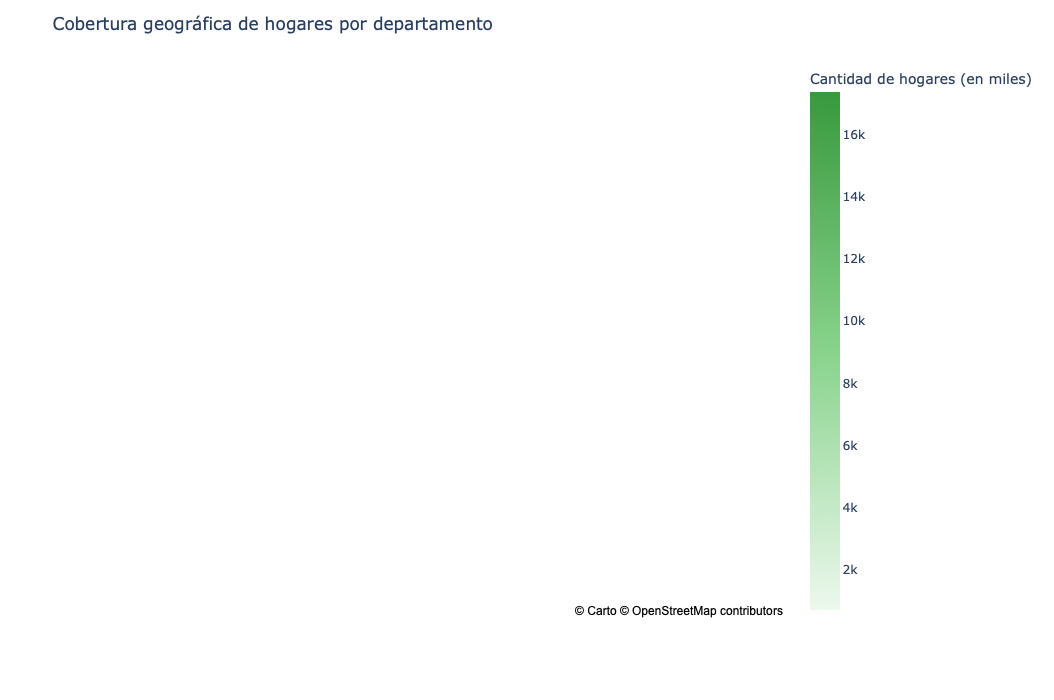

In [407]:
df_map = df_analisis.groupby("DEPARTAMENTO").size().reset_index(name="count")

url = "https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson"
geojson = requests.get(url).json()

fig = px.choropleth_mapbox(
    df_map,
    geojson=geojson,
    featureidkey="properties.NOMBDEP",  
    locations="DEPARTAMENTO",          
    color="count",
    color_continuous_scale=["#ECF8ED","#88D38C","#38993D"],
    mapbox_style="carto-positron",
    zoom=4.3, center={"lat": -9.2, "lon": -75},
    opacity=0.6,
    labels={"count":"Cantidad de hogares (en miles)"}
)

fig.update_layout(
    title="Cobertura geográfica de hogares por departamento",
    width=700,  
    height=700   
)

fig.show()

In [449]:
df_pobreza = df_analisis["POBREZA"].value_counts(normalize=True).reset_index()
df_pobreza.columns = ["POBREZA", "Proporción"]

In [455]:
chart = alt.Chart(df_pobreza).mark_bar().encode(
    x=alt.X("POBREZA:N", 
            sort=alt.SortField(field="Proporción", order="descending"),
            axis=alt.Axis(title="Categoría de pobreza", labelAngle=0)),
    y=alt.Y("Proporción:Q", title="Proporción de hogares", axis=alt.Axis(format='%')),
    color=alt.Color(
        "POBREZA:N",
        legend=None,
        scale=alt.Scale(
            domain=df_pobreza["POBREZA"].tolist(),  # categorías de pobreza
            range=["#47B370", "#1386BD", "#D12E39"]  # colores personalizados
        )
    )
).properties(
    title="Distribución proporcional de hogares según condición de pobreza",
    width=400,
    height=300
)

chart.display()


alt.Chart(...)

In [474]:
df_analisis

,ANIO,DEPARTAMENTO,UBIGEO,LONGITUD,LATITUD,ESTRATO_SOCIAL,POBREZA,CODIGO_UNICO_EXT,MATERIAL_PAREDES,MATERIAL_PISOS,MATERIAL_TECHOS,ELECTRICIDAD,NUM_HABITACIONES,INTERNET,ABASTECIMIENTO_AGUA,AGUA_POTABLE,SERVICIOS_HIGIENICOS,TIENE_SEGURO,NINOS_ASISTEN_COLEGIO,SITUACION_EDUCATIVA_ESPERADA,SABE_LEER_ESCRIBIR,TIPO_TRABAJADOR,INGRESO_TOTAL,RECIBIO_PENSION65,RECIBIO_JUNTOS,MONTO_JUNTOS,MONTO_PENSION65
0,2014,AMAZONAS,010101,-77.876726,-6.226909,D,No Pobre,2014-08-000002-108-11-010101-4-4-3-29-1,Materiales tradicionales de tierra,Piso precario o sin acondicionar,Materiales estructurales formales,Sí,4,No,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,2602.0,No,No,0.0,0.0
1,2014,AMAZONAS,010101,-77.866652,-6.221138,E,No Pobre,2014-03-000009-072-11-010101-4-4-1-49-0,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,Sí,4,No,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,1200.0,No,No,0.0,0.0
2,2014,AMAZONAS,010201,-78.532602,-5.640051,D,No Pobre,2014-11-000042-013-11-010201-7-4-1-46-1,Materiales formales o resistente,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,3,No,Red pública formal directa,No,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,2500.0,No,No,0.0,0.0
3,2014,AMAZONAS,010201,-78.532602,-5.640051,D,No Pobre,2014-11-000042-013-11-010201-7-4-2-36-0,Materiales formales o resistente,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,3,No,Red pública formal directa,No,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,1800.0,No,No,0.0,0.0
4,2014,AMAZONAS,010201,-78.532602,-5.640051,D,No Pobre,2014-11-000042-043-11-010201-7-4-1-54-1,Materiales tradicionales de tierra,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,2,No,Red pública formal directa,No,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,3000.0,No,No,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,2019,LIMA,150806,-77.409560,-11.099431,D,No Pobre,2019-12-010656-007-11-150806-2-2-3-22-0,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,Sí,3,Sí,Red pública formal directa,Sí,Sí,1,Asisten,Inscrito actualmente,Sí,Empleado,960.0,No,No,0.0,0.0
91427,2019,MOQUEGUA,180211,-70.725803,-16.228975,Rural,No Pobre,2019-12-011349-045-11-180211-6-8-1-63-1,Materiales tradicionales de tierra,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,4,No,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Obrero,1724.0,No,No,0.0,0.0
91428,2019,MOQUEGUA,180101,-70.939144,-17.212932,E,No Pobre,2019-12-011350-003-11-180101-3-3-4-24-0,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,Sí,4,Sí,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,1500.0,No,No,0.0,0.0
91429,2019,MOQUEGUA,180101,-70.939144,-17.212932,E,No Pobre,2019-12-011350-003-11-180101-3-3-5-24-1,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,Sí,4,Sí,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Obrero,4000.0,No,No,0.0,0.0


In [475]:
df_clustering_exploratorio

,CODIGO_UNICO_EXT,MATERIAL_PAREDES,MATERIAL_PISOS,MATERIAL_TECHOS,ELECTRICIDAD,NUM_HABITACIONES,INTERNET,ABASTECIMIENTO_AGUA,AGUA_POTABLE,SERVICIOS_HIGIENICOS,TIENE_SEGURO,NINOS_ASISTEN_COLEGIO,SITUACION_EDUCATIVA_ESPERADA,SABE_LEER_ESCRIBIR,TIPO_TRABAJADOR,INGRESO_TOTAL,RECIBIO_PENSION65,RECIBIO_JUNTOS,MONTO_JUNTOS,MONTO_PENSION65
0,2014-08-000002-108-11-010101-4-4-3-29-1,Materiales tradicionales de tierra,Piso precario o sin acondicionar,Materiales estructurales formales,Sí,4,No,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,2602.0,No,No,0.0,0.0
1,2014-03-000009-072-11-010101-4-4-1-49-0,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,Sí,4,No,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,1200.0,No,No,0.0,0.0
2,2014-11-000042-013-11-010201-7-4-1-46-1,Materiales formales o resistente,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,3,No,Red pública formal directa,No,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,2500.0,No,No,0.0,0.0
3,2014-11-000042-013-11-010201-7-4-2-36-0,Materiales formales o resistente,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,3,No,Red pública formal directa,No,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,1800.0,No,No,0.0,0.0
4,2014-11-000042-043-11-010201-7-4-1-54-1,Materiales tradicionales de tierra,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,2,No,Red pública formal directa,No,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,3000.0,No,No,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,2019-12-010656-007-11-150806-2-2-3-22-0,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,Sí,3,Sí,Red pública formal directa,Sí,Sí,1,Asisten,Inscrito actualmente,Sí,Empleado,960.0,No,No,0.0,0.0
91427,2019-12-011349-045-11-180211-6-8-1-63-1,Materiales tradicionales de tierra,Piso de cemento,Materiales semi-formales o industriales ligeros,Sí,4,No,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Obrero,1724.0,No,No,0.0,0.0
91428,2019-12-011350-003-11-180101-3-3-4-24-0,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,Sí,4,Sí,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Empleado,1500.0,No,No,0.0,0.0
91429,2019-12-011350-003-11-180101-3-3-5-24-1,Materiales formales o resistente,Piso de cemento,Materiales estructurales formales,Sí,4,Sí,Red pública formal directa,Sí,Sí,1,Asisten,Adulto (25+) sin matrícula — no aplica,Sí,Obrero,4000.0,No,No,0.0,0.0


# 9. Visualización de datos con Tsne

In [25]:
import pandas as pd
df_analisis_tsne = pd.read_csv('df_analisis_tsne.csv')

In [9]:
df_clustering = pd.read_csv('df_multidimensional_2014_2024_clustering.csv', index_col=0)

In [27]:
df_unido = pd.concat([df_clustering, df_analisis_tsne["DEPARTAMENTO"]], axis=1)

In [28]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91431 entries, 0 to 91430
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CODIGO_UNICO_EXT              91431 non-null  object 
 1   MATERIAL_PAREDES              91431 non-null  int64  
 2   MATERIAL_PISOS                91431 non-null  int64  
 3   MATERIAL_TECHOS               91431 non-null  int64  
 4   ELECTRICIDAD                  91431 non-null  int64  
 5   NUM_HABITACIONES              91431 non-null  int64  
 6   INTERNET                      91431 non-null  int64  
 7   ABASTECIMIENTO_AGUA           91431 non-null  int64  
 8   AGUA_POTABLE                  91431 non-null  int64  
 9   SERVICIOS_HIGIENICOS          91431 non-null  int64  
 10  TIENE_SEGURO                  91431 non-null  int64  
 11  NINOS_ASISTEN_COLEGIO         91431 non-null  int64  
 12  SITUACION_EDUCATIVA_ESPERADA  91431 non-null  int64  
 13  SABE_L

/Users/fiorella/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 91431 samples in 0.006s...
[t-SNE] Computed neighbors for 91431 samples in 34.759s...
[t-SNE] Computed conditional probabilities for sample 1000 / 91431
[t-SNE] Computed conditional probabilities for sample 2000 / 91431
[t-SNE] Computed conditional probabilities for sample 3000 / 91431
[t-SNE] Computed conditional probabilities for sample 4000 / 91431
[t-SNE] Computed conditional probabilities for sample 5000 / 91431
[t-SNE] Computed conditional probabilities for sample 6000 / 91431
[t-SNE] Computed conditional probabilities for sample 7000 / 91431
[t-SNE] Computed conditional probabilities for sample 8000 / 91431
[t-SNE] Computed conditional probabilities for sample 9000 / 91431
[t-SNE] Computed conditional probabilities for sample 10000 / 91431
[t-SNE] Computed conditional probabilities for sample 11000 / 91431
[t-SNE] Computed conditional probabilities for sample 12000 / 91431
[t-SNE] Computed conditional probabilities for s

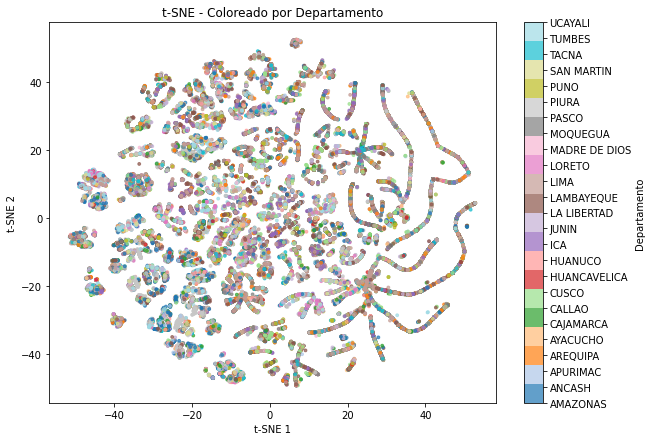

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = df_unido.drop(columns=["CODIGO_UNICO_EXT", "DEPARTAMENTO"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. t-SNE ---
tsne = TSNE(
    n_components=2,
    perplexity=200,
    learning_rate=200,
    n_iter=1000,
    random_state=42,
    verbose=1, metric = 'manhattan'
)
X_tsne = tsne.fit_transform(X_scaled)

dept_codes = df_unido["DEPARTAMENTO"].astype("category").cat.codes

plt.figure(figsize=(10,7))
scatter = plt.scatter(
    X_tsne[:,0], X_tsne[:,1],
    c=dept_codes, cmap="tab20", s=8, alpha=0.7
)
plt.title("t-SNE - Coloreado por Departamento")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

cbar = plt.colorbar(scatter, ticks=range(len(df_unido["DEPARTAMENTO"].astype("category").cat.categories)))
cbar.ax.set_yticklabels(df_unido["DEPARTAMENTO"].astype("category").cat.categories)
cbar.set_label("Departamento")

plt.show()

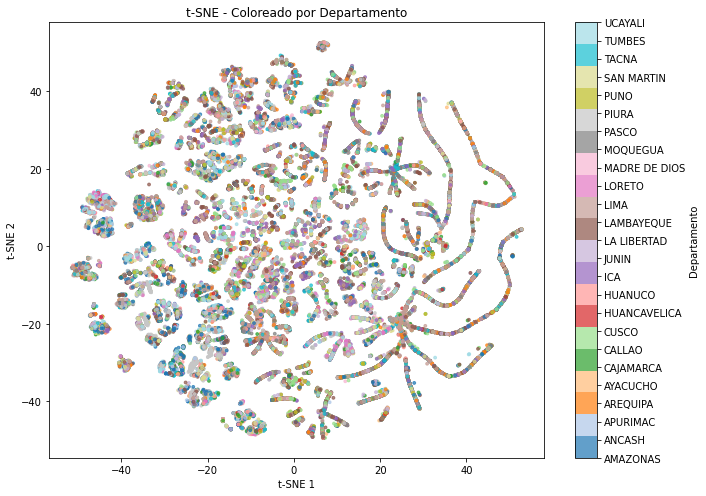

In [24]:
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    X_tsne[:,0], X_tsne[:,1],
    c=dept_codes, cmap="tab20", s=8, alpha=0.7
)
plt.title("t-SNE - Coloreado por Departamento")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

cbar = plt.colorbar(scatter, ticks=range(len(df_unido["DEPARTAMENTO"].astype("category").cat.categories)))
cbar.ax.set_yticklabels(df_unido["DEPARTAMENTO"].astype("category").cat.categories)
cbar.set_label("Departamento")
plt.tight_layout()
plt.savefig("tsne_departamento_v1.pdf", format="pdf", dpi=300)

plt.show()